# Deep learning fundamentals

## Pytorch

It's an open source machine learning library for python, it was developed by facebook's ai resource lab and is used  by researches and developers all around the world. It's used in some industries such as healthcare, finance and manufacturing.

Creating a tensor:

In [2]:
import torch

In [3]:
sample = torch.tensor([10,11])
sample.shape

torch.Size([2])

In [4]:
x = torch.tensor([[10,11],[1,2]])
x.shape

torch.Size([2, 2])

In [5]:
y = torch.tensor([[10],[11]])
y.shape

torch.Size([2, 1])

In [7]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Creating a 3-dimensional tensor:

a = torch.tensor([[[1,2], [3,4]],[[5,6],[7,8]]])

# Setting the lists that are going to store the values for each dimension in the tensor.

x_vals = []
y_vals = []
z_vals = []

for i in range (a.shape[0]):
    for j in range (a.shape[1]):
        for k in range (a.shape[2]):
            x_vals.append(i)
            y_vals.append(j)
            z_vals.append(k)

# Creating a plotly 3d scatter plot for better visualization:

trace = go.Scatter3d(
    x = x_vals,
    y = y_vals,
    z = z_vals,
    mode = 'markers',
    marker = dict(
        size = 5,
        color = a.flatten(),
        colorscale = 'Viridis',
        opacity = 0.8
    )
)

# Creating the plot layout:

layout = go.Layout(
    margin = dict(l=0,r=0,b=0,t=0),
    scene = dict(
        xaxis = dict(title='Dimension 1'),
        yaxis = dict(title='Dimension 2'),
        zaxis = dict(title='Dimension 3')
    )
)

fig = go.Figure(data = [trace], layout = layout)
pyo.plot(fig, filename='tensor.html')

'tensor.html'

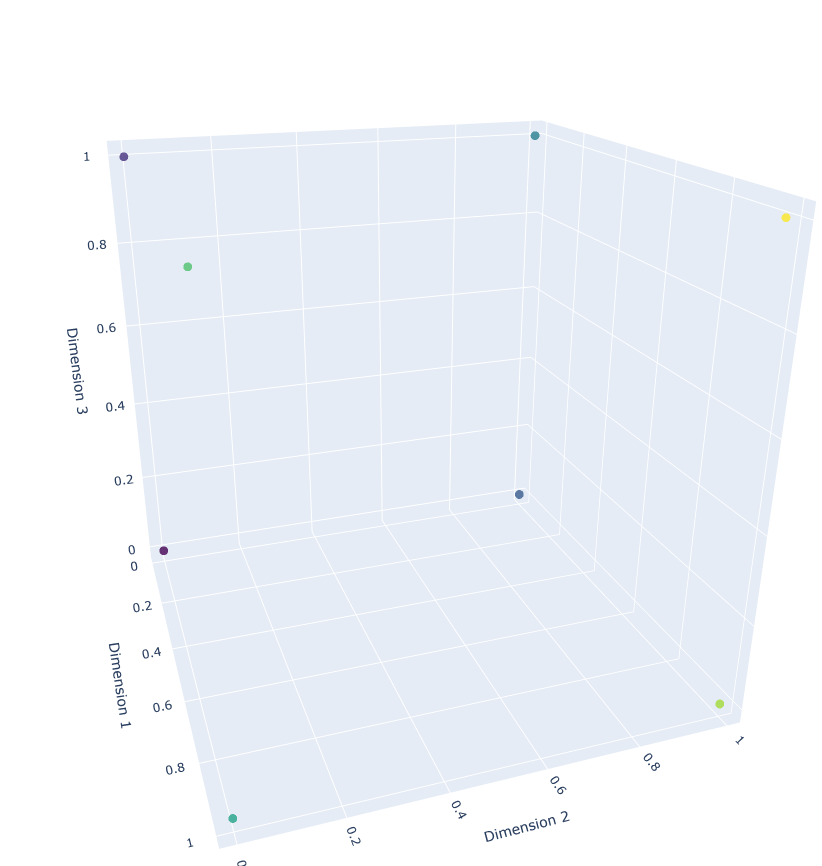

Most of operations with tensors works the same way as matrix operations: 

In [8]:
x = torch.tensor([[1,2,3,4],[5,6,7,8]])
x.shape

torch.Size([2, 4])

In [9]:
x * 10

tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])

In [10]:
x.add(10)

tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])

In [11]:
x.shape

torch.Size([2, 4])

In [12]:
x.view(4,2) # Resizes the tensor by changing it's dimensions

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

Note that when using the view() function, the number of elements will stay the same.

In [13]:
a = torch.ones(2,1,10) # creating a 2x1x10 tensor full of 1's

In [14]:
a

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])

In [17]:
print(f"This is the shape before squeezing: {a.shape}")
squeezed = a.squeeze(1)
print(f"This is the shape before squeezing: {squeezed.shape}")

# The result is the same tensor, but without the i-th dimension (this case first dimension, considering
# it starts the couting from zero.

This is the shape before squeezing: torch.Size([2, 1, 10])
This is the shape before squeezing: torch.Size([2, 10])


## Matrix multiplication with Tensors

If A and B are two matrices, we can multiply them together only if they are of shape A(n x m) and B (m x z), which would result in a matrix of shape C (n x z)

In [22]:
x = torch.tensor([[1,2,3,4],[5,6,7,8]]) # Shape = (2,4)
y = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]]) # Shape = (4,3)

In [23]:
torch.matmul(x,y)

tensor([[ 70,  80,  90],
        [158, 184, 210]])

### Concatenation

In [25]:
x = torch.randn(1,4,5)
z = torch.cat([x,x], axis = 1)
print('Concatenated axis 1:', x.shape, z.shape)

Concatenated axis 1: torch.Size([1, 4, 5]) torch.Size([1, 8, 5])


### Permute

In [27]:
x = torch.randn(3,20,10)
z = x.permute(2,0,1) # changes the dimensions of the first elemento to the last, last to the second, etc
print('Permute dimensions:', x.shape, z.shape)

Permute dimensions: torch.Size([3, 20, 10]) torch.Size([10, 3, 20])


# Architecture

In this code, a neural network will be built using pytorch.

In [1]:
import torch
from torchviz import make_dot
# Defining input and target output data
# y is the sum of elements of x
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

# converting lists to tensors to be able to use with pytorch 
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [2]:
# Creating a custom pytorch model:

import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        # When we call the super().__init__() method, we ensure we are inheriting
        super().__init__()
        self.layer1 = nn.Linear(2, 8)  # A linear layer
        self.activation = nn.ReLU()   # Activation function
        self.layer2 = nn.Linear(8, 1)

    # When we pass something through the model object, it calls the forward method
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

In [3]:
# Now, creating a instance of this new neural network:
model = MyNeuralNet()

In [9]:
X.shape

torch.Size([4, 2])

In [10]:
model.layer1.weight

Parameter containing:
tensor([[ 0.2070,  0.5024],
        [-0.2856, -0.5536],
        [ 0.6897,  0.4461],
        [ 0.2334,  0.6723],
        [ 0.0529,  0.5016],
        [ 0.6201, -0.1369],
        [ 0.0487,  0.6141],
        [ 0.1021,  0.2795]], requires_grad=True)

# Activation and loss functions

They are critical components of a neural network and are responsible for mapping inputs to outputs and measuring the network's performance.

## Activation function

An activation function is an mathematical function applied to the input of a neuron to determine its output. It introduces non-linearity into the network, allowing it to learn complex patterns in the data. One commonly used activation function is the sigmoid functio, which maps any input value to a value between 0 and 1. This function is used when we want the output to represent a probability. Another popular activation function is the ReLU function, which maps any input value less than zero to zero and any value greater than zero to itself. This function is simple and computationally efficient, making it a popular choice in deep learning.

## Loss functions

A loss function is used to measure how well the network is performing. It compares the predicted output of the network to the actual output and returns a value that indicates how far off the prediction was. One commonly used loss function is the MSE. It calculates the average squared difference between the predicted output and the actual output. This function is used when the output is a continuous value.

Another popular loss function is the cross-entropy loss function: it measures the difference between the predicated output and the actual output in terms of the probability distribution. This function is commonly used when the output is a classification problem.

By selecting the appropriate activation and loss functions, we can train the network to accurately predict the desired output.

In [11]:
import math
import torch
import numpy as np

##### ACTIVATION FUNCTIONS #####

# Sigmoid function: (1/1+e^(-x)):
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# ReLU function: 0 if x < 0, x if x > 0.
class ReLU(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self,x):
        return torch.max(torch.zeros_like(x),x)

##### LOSS FUNCTIONS #####
    
# Mean-squared error:
    def mse_loss(y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

# Cross entropy loss

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    ypred = np.clip(y_pred, epsilon, 1. - epsilon) # to avoid zero division
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Optimizers

When we train a neural network, we aim to minimize the loss function by updating the parameters of the network. However, the process of updating these parameters is not straightforward, thats' when the role of an optimizer comes into play: an optimizer is an algorithm used to update the weights and biases of a neural network to minimize the loss during training.

The optimizer computes the gradients of the loss function with respect to the network's parameters and then adjusts those parameters to reduce the loss. One ot the most commonly used optimizer algorithms is the gradient descent optimizer, which updates the network's parameters by moving in the direction of the steepest descent of the loss function.

There are some other popular optimizer functions such as Adam, RMSProp and Adagrad. The choice of optimizer function can have a significant impact on the training process and the performance of the neural network, with each one working better for each type of neural network and datasets.

In the following code, a neural network will be trained applying the concepts explained until now:

In [14]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

# Creating dataset

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

# Model architecure

class MyNeuralNet(nn.Module):
    def __init__(self):
        # When we call the super().__init__() method we ensure we are inheriting
        super().__init__()
        self.layer1 = nn.Linear(2, 8)  # A linear layer
        self.activation = nn.ReLU()   # Activation function
        self.layer2 = nn.Linear(8, 1)

    # When we pass something through the model object, it calls the forward function
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

model = MyNeuralNet()

# Loss Function
loss_func = nn.MSELoss()

# Optimizer
opt = SGD(model.parameters(), lr = 0.001)

# Training loop
losses = []
for _ in range(50): # 50 epochs
    opt.zero_grad() # Setting gradients to zero before every epoch
    loss_value = loss_func(model(X),Y)
    # the gradients of the loss function with respect to all the trainable parameters of the
    # network are computed and stored in the grad attribute of the corresponding tensors.
    loss_value.backward()

    # opt.step() is to update the weights and biases of the neural network using
    # the computed gradients and the chosen optimization algorithm
    opt.step()
    losses.append(loss_value.detach().numpy())

Text(0, 0.5, 'loss value')

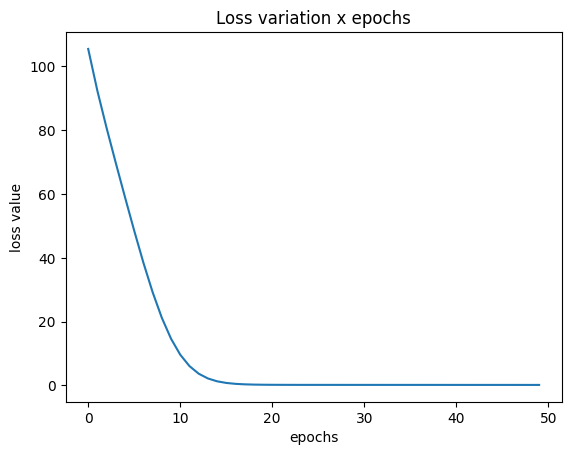

In [15]:
# Loss Plot
plt.plot(losses)
plt.title('Loss variation x epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

# Dataset and Data Loader

DataLoader is one of the most important tools for training neural networks on Pytorch, being a utiliy that helps to load the data from the dataset and prepare it for training, enabling us to effieciently load large datasets and divide them into smaller batches.

Separating the data in batches is important for computational efficiency since it enables us to process the data in parallel, utilizing the full power of the GPU. The batch_size parameter is a hyperparameter that determines how many samples are processed in one iteration, having a significant impact on the training process: a smaller batch size results in faster convergence but less accurate estimates of the gradient, while a larger batch size gives more accurate estimates but takes longer to train.


In [19]:
from torch.utils.data import Dataset, DataLoader

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

class MyDataSet(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __len__(self):
        return len(self.x)
    def __getitem__(self,ix):
        return self.x[ix], self.y[ix]

ds = MyDataSet(x,y)

# DataLoader object is used to load data from a dataset and return it in
# the form of mini-batches, providing an iterable over the dataset, with
# support for multi-process data loading and customizable data transformations.

# Notice batch size
dl = DataLoader(ds, batch_size=2, shuffle=True)

# To load the data, we loop through it:
for x,y in dl:
    print(x,y)

tensor([[1., 2.],
        [7., 8.]]) tensor([[ 3.],
        [15.]])
tensor([[3., 4.],
        [5., 6.]]) tensor([[ 7.],
        [11.]])


## Using the DataLoader object in the training code

In [22]:
from torch.optim import SGD
import torch
import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        # When we call the super().__init__() method we ensure we are inheriting
        super().__init__()
        self.layer1 = nn.Linear(2, 8)  # A linear layer
        self.activation = nn.ReLU()   # Activation function
        self.layer2 = nn.Linear(8, 1)

    # When we pass something through the model object, it calls the forward function
    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

model = MyNeuralNet()
loss_func = nn.MSELoss()
opt = SGD(model.parameters(), lr = 0.001)

losses = []
for _ in range(50): # 50 epochs
    for data in dl:
        opt.zero_grad() # Setting gradients to zero before each epoch
        x1, y1 = data
        loss_value = loss_func(model(x1),y1)
        # the gradient of the loss function with respect to all the trainable parameters of
        # the network are computed and stored in the grad attribute of the corresponding tensors.
        loss_value.backward()

        # opt.step() is to update the weights and biases of neural network using the 
        # computed gradients and the chosen optimization algorithm
        opt.step()
        losses.append(loss_value.detach().numpy())

# Sequential

In [27]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

class MyDataSet(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __len__(self):
        return len(self.x)
    def __getitem__(self,ix):
        return self.x[ix], self.y[ix]

ds = MyDataSet(x,y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

# Instead of creating a model class this time,we simply created a model using the sequential method
# as our input had to be passed to the next layer directly, without any sort of modification.

model = nn.Sequential(nn.Linear(2,8),
                      nn.ReLU(),
                      nn.Linear(8,1)).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [28]:
from torch.optim import SGD
import time

# Training the model

loss_func = nn.MSELoss()
opt = SGD(model.parameters(),lr = 0.001)
loss_history = []
start = time.time()

model.train()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)

end = time.time()
print(end - start)

0.07150650024414062


## Predicting on validating dataset

In [29]:
val = [[8,9],[10,11],[1.5,2.5]]
model(torch.tensor(val).float().to(device))

tensor([[17.0027],
        [21.0022],
        [ 3.9764]], grad_fn=<AddmmBackward0>)

# Introduction to Image Classification

Images are a rich source of information, and neural networks can be used to automatically extract useful features and patterns from them. In image classification, a neural network takes an image as input and produces a probability distribution over a set of classes as output, the most probable class is then chosen as the predicted label for the image.

Convulational neural networks are a type of neural network commonly used for image classification, consisting of convolutional layers, pooling layers and fully connected layers. Convulational layers use filters to extract features from the input image.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
img = cv.imread('ab6761610000e5eb31f6ab67e6025de876475814.jpg')

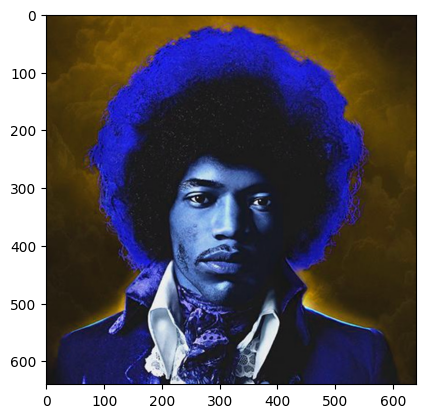

In [3]:
# OpenCV by default read the image in BGR
plt.imshow(img)

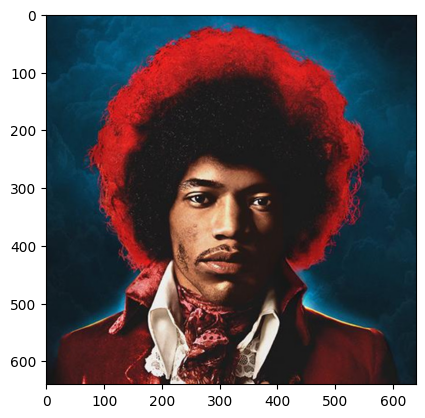

In [6]:
# Converting it to RGB
rgb_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

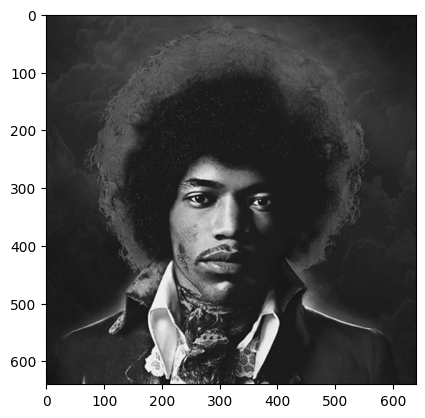

In [10]:
# Its also possible to convert it to grayscale (may be useful sometimes)
gray_image = cv.cvtColor(rgb_image, cv.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [11]:
rgb_image.shape

(640, 640, 3)

In [12]:
gray_image.shape

(640, 640)

As it is possible to visualize above, gray images have 1 less dimensions than RGB or BGR images, making them better for computational performance.

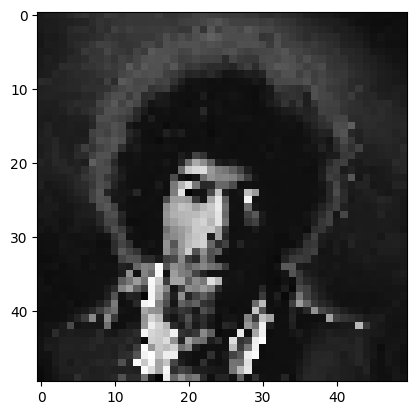

In [17]:
# Its possible to resize an image, reducing its quality but making it lighter, while trying to maintaing its features:
img_gray_small = cv.resize(gray_image, (50,50))
plt.imshow(img_gray_small, cmap = 'gray')

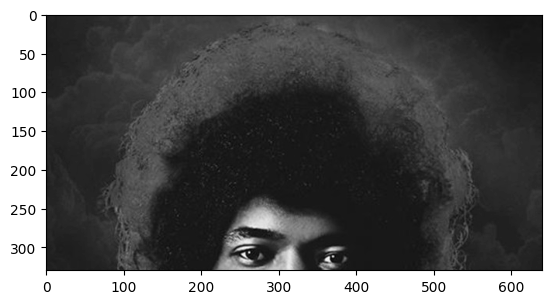

In [18]:
# It's also possible to crop a certain portion of the image:
plt.imshow(gray_image[10:340,:], cmap='gray')

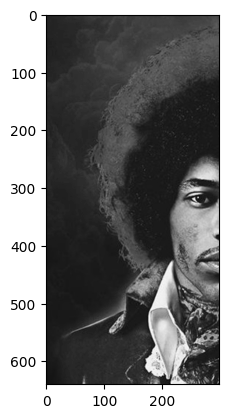

In [19]:
plt.imshow(gray_image[:,:300], cmap='gray')

## Image Classification

Here, we will work with the FMNIST Dataset

In [1]:
from torchvision import datasets
import torch
data_folder = ''
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

100%|█████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:04<00:00, 6.36MB/s]


Extracting FashionMNIST\raw\train-images-idx3-ubyte.gz to FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 151kB/s]


Extracting FashionMNIST\raw\train-labels-idx1-ubyte.gz to FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:01<00:00, 2.43MB/s]


Extracting FashionMNIST\raw\t10k-images-idx3-ubyte.gz to FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to FashionMNIST\raw



In [2]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

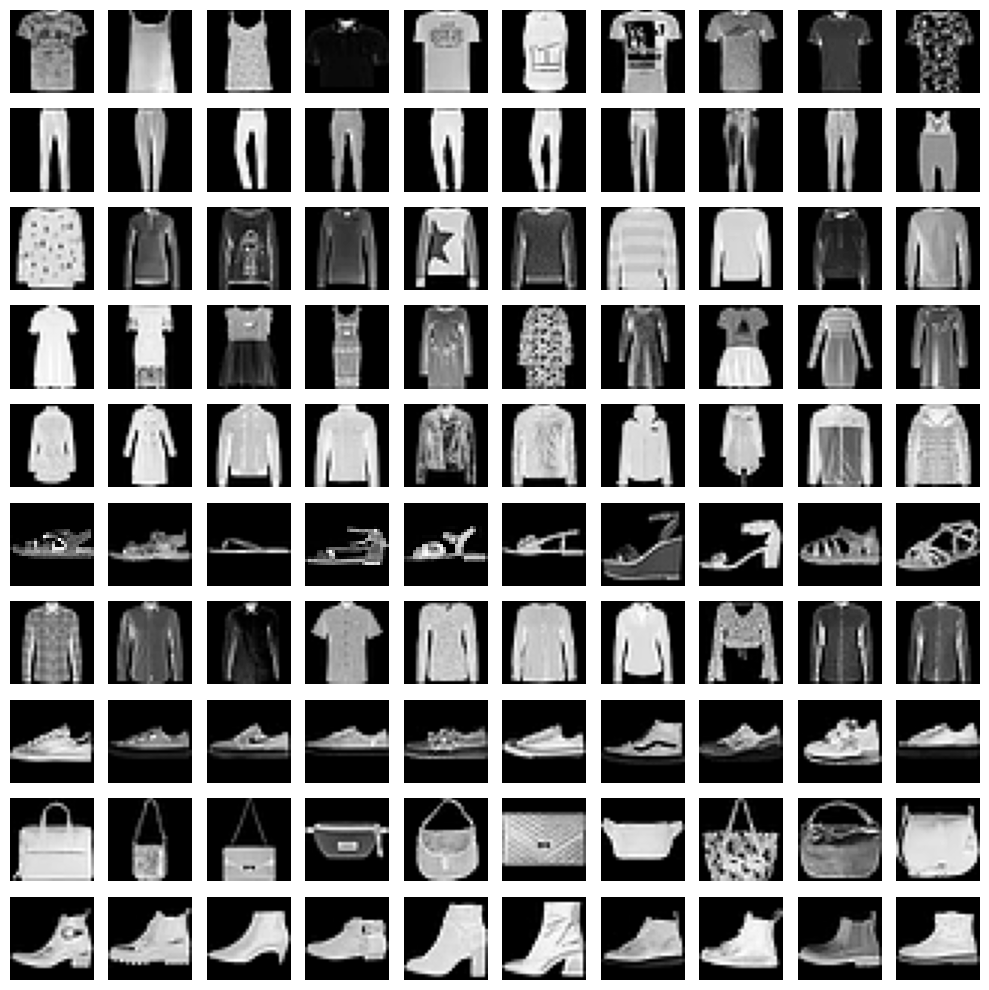

In [4]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R,C,figsize=(10,10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x,y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

## Converting Images to Tensor (Creating the Dataset)

In [5]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from torchvision import datasets

In [6]:
class FMNISTDataset(Dataset):
    def __init__(self,x,y):
        x = x.float()
        # We are flattening each image, height = width = 28.
        # -1 means other dimensions would ajust automatically based on the # of elements.
        x = x.view(-1,28*28)
        self.x, self.y = x,y
    def __getitem__(self,idx):
        x,y = self.x[idx], self.y[idx]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [7]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

In [8]:
# Training the model
from torch.optim import SGD
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr = 1e-2)
    return model, loss_fn, optimizer

In [16]:
@torch.no_grad()
def accuracy_fn(x,y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [17]:
def train_batch(x,y,model,opt,loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    # Flush gradients memory for next batch of calculations
    optimizer.zero_grad()
    return batch_loss.item()

In [18]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [21]:
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy_fn(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


C:\Users\pedro\AppData\Local\Temp\ipykernel_18676\95088970.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


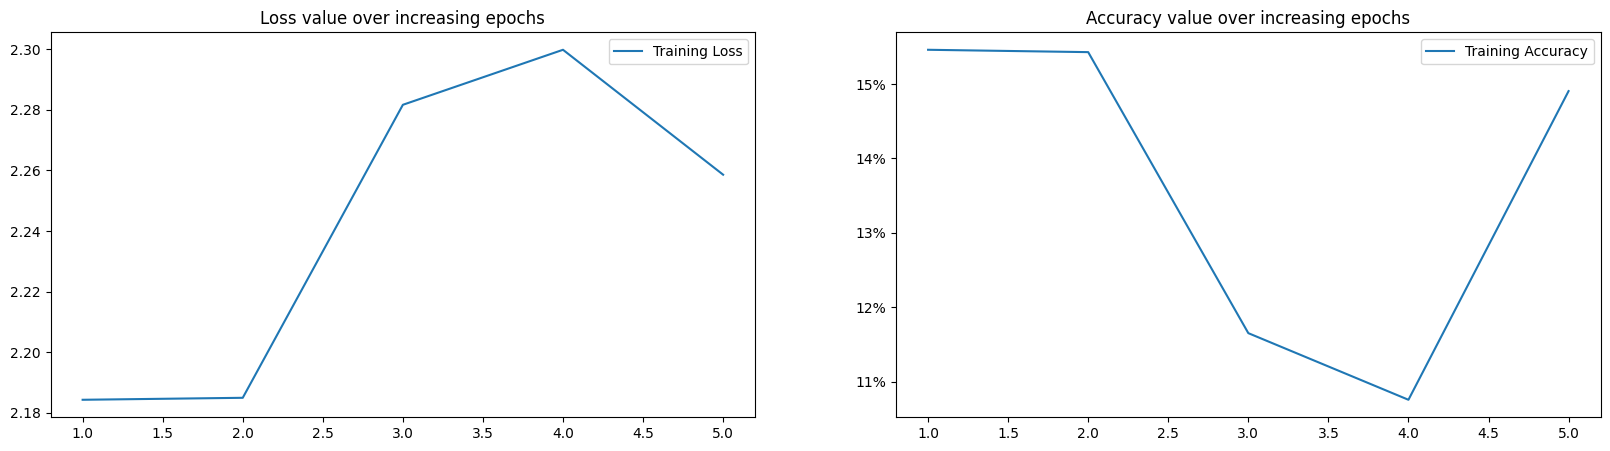

In [23]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()

plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()


# Hyperparameter Tuning

In an image classification project, it's needed to make the machine learn how to classify images well. But what if the model is not learning as wel as we want it to?

Hyperparameters are the parameters in a neural network that are set before training, such as the learning rate, number of layers, and number of neurons in each layer. These parameters can not be learned by the model during training, and they affect how the model learns from the data. One important hyperparameter is the learning rate, which determines how much the weights of the model are updated with each batch of data.

If the learning rate is too low, the model may take a long time to learn, while if it's too high, the model may not even converge at all.

Another important hyperparameter is the number of neurons in each layer: if the number of neurons is too low, the model may not have enough capacity to learn from the data, while if it's too high, the model may overfit the training data and not generalize well to new data.

In [1]:
from torchvision import datasets
import torch
data_folder = ''
fmnist = datasets.FashionMNIST(data_folder, download=True,train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

100%|█████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:03<00:00, 6.62MB/s]


Extracting FashionMNIST\raw\train-images-idx3-ubyte.gz to FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 148kB/s]


Extracting FashionMNIST\raw\train-labels-idx1-ubyte.gz to FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:01<00:00, 2.67MB/s]


Extracting FashionMNIST\raw\t10k-images-idx3-ubyte.gz to FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 5.16MB/s]

Extracting FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to FashionMNIST\raw



In [3]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
# Model with 2 Hidden Layers

class FMNISTDataset(Dataset):
    def __init__(self,x,y):
        x = x.float()
        x = x.view(-1, 28*28) / 255
        self.x, self.y = x,y
    def __getitem__(self,ix):
        x,y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=  1e-3)
    return model, loss_fn, optimizer

def train_batch(x,y,model,opt,loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy_fn(x,y,model):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

@torch.no_grad()
def val_loss(x,y,model):
    prediction = model(x)
    val_loss = loss_fn(prediction,y)
    return val_loss.item()

def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32,shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
    return trn_dl, val_dl

In [13]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer= get_model()

In [16]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x,y = batch
        batch_loss = train_batch(x,y,model,optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy_fn(x,y,model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy_fn(x,y,model)
        validation_loss = val_loss(x,y,model)

    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


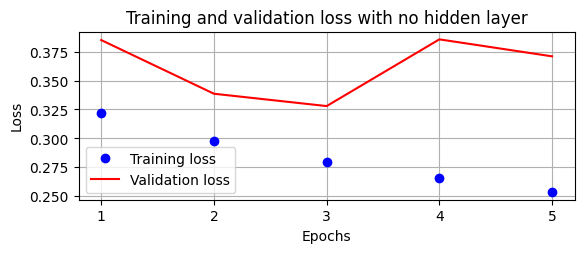

C:\Users\pedro\AppData\Local\Temp\ipykernel_11940\1890947205.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


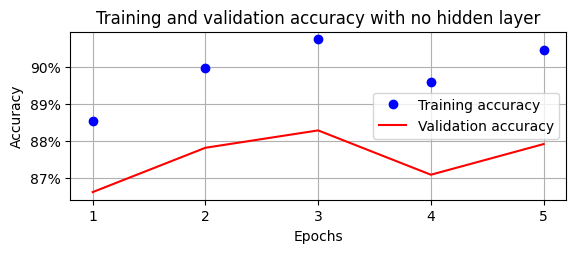

In [19]:
epochs = np.arange(5) + 1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid(True)
plt.legend()
plt.show()

# Data Normalization

Normalizing images means adjusting their pixel values to a standard range, typically between 0 and 1 or -1 and 1. This process is essential for computer vision models because it helps to improve their accuracy by removing biases and inconsistencies in the data.

Here are a few reasons why normalizing images is necessary for training computer vision models:
1. Removing brightness variations: images captured by cameras can have variations in brightness and contrast due to lighting conditions. Normalizing images helps to remove these variations and ensures that the model is not biased towards brighter or darker images.
   
2. Impriving convergence: normalization can help to improve the convergence of computer vision models during training. When the input values are within a certain range, the gradients can be more reliable, and the optimization process canbe more stable.

3. Better utilization of resources: normalization can also help with improving the utilization of computational resources when training a computer vision model.

# **Convolutional Neural Networks (CNNs)**

Convolutional layers can learn to recognize patterns in images by looking at small parts of the image at a time, making them much more efficient and accurate than fully connected layers.

They are designed to identify local patterns in an image, such as edges, corners and textures by applying a series of filters (kernels) to the image, which convolve with the image to create feature maps. These feature maps capture the presence of specific patterns and features in the image, such as the edges of an object or the texture of its surface.

By stacking multiple convolutional layers in a neural network, the network can learn more complex and abstract features from the image. In addition, to convolutional layers, they also use pooling layers, which downsample the feature maps, and fully connected layers, which combine the learned features into a prediction.

In the following example, a CNN will be created for classifying binary data.

In [1]:
import torch
device = 'cpu'

X_train = torch.tensor([[[4, 5, 6, 7], [5, 6, 7, 8], [8, 9, 10, 11], [4, 6, 7, 8]], 
                        [[-4, 5, 6, -7], [5, -6, 7, 8], [-8, 9, -10, 11], [-4, -6, 7, -8]]]).float().to(device)
X_train.div_(8)
y_train = torch.tensor([0, 1]).float().to(device)

X_train.shape

torch.Size([2, 4, 4])

In [2]:
y_train.shape

torch.Size([2])

In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam

def get_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(1, 1),
        nn.Sigmoid()
    ).to(device)
    
    loss_fn = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=0.01)
    
    return model, loss_fn, optimizer

In [4]:
model, criterion, optimizer = get_model()

In [5]:
model

Sequential(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [7]:
def train_batch(x,y,model,optimizer,loss_fn):
    model.train()
    optimizer.zero_grad()
    prediction = model(x)
    batch_loss = loss_fn(prediction.squeeze(), y.squeeze())
    batch_loss.backward()
    optimizer.step()
    return batch_loss.item()

In [8]:
from torch.utils.data import TensorDataset, Dataset, DataLoader

trn_dl = DataLoader(TensorDataset(X_train,y_train))

for epoch in range(2000):
    for ix, batch in enumerate(trn_dl):
        x,y = batch
        x = x.to(device)
        y = y.to(device)
        batch_loss = train_batch(x,y,model,optimizer,criterion)

In [9]:
model(X_train[:1])

tensor([[4.9529e-05]], grad_fn=<SigmoidBackward0>)

## Data augmentation

Data augmentation is the process of generating new traning data by applying transformations to the existing images in the dataset, increasing the size and diversity of the dataset and can help improve the model's accuracy.

For example, by applying random rotations, flips, and crops to an image, we can generate multiple variations fo that same image, making the dataset larger and more diverse. By training the model with the augmented data, we're able to improve its performance on the image classification task.

Now, let's train a model using augmented data:

In [1]:
from torchvision import datasets
import torch
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

device = 'cpu'
data_folder = ''
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder,
                                   download=True,
                                   train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [3]:
import albumentations as A
from albumentations.augmentations.geometric.transforms import ShiftScaleRotate

aug = A.Compose([
    ShiftScaleRotate(shift_limit_x=0.1, shift_limit_y=0, scale_limit=0, rotate_limit=0, p=1, border_mode=0),
])

In [4]:
class FMNISTDataset(Dataset):
    def __init__(self, x,y,aug=None):
        self.x, self.y = x,y
        self.aug = aug
    def __getitem__(self,ix):
        x,y = self.x[ix], self.y[ix]
        return x,y
    def __len__(self):
        return len(self.x)
    def collate_fn(self,batch):
        ims, classes = list(zip(*batch))
        if self.aug:
            ims_np = np.array([tensor.numpy() for tensor in ims])
            ims = self.aug.augment_images(images=ims_np)

        ims = torch.tensor(ims)[:,None,:,:].to(device)/255.
        classes = torch.tensor(classes).to(device)
        return ims,classes

In [5]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=3),
        nn.MaxPool2d(2),
        nn.Conv2d(64, 128, kernel_size=3),
        nn.MaxPool2d(2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(3200, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.zero_grad()
    optimizer.step()
    return batch_loss.item()

In [ ]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets, aug=aug)
    # Notice the collate_fn argument
    trn_dl = DataLoader(train, batch_size=64, 
                        collate_fn=train.collate_fn, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images),
                        collate_fn=val.collate_fn, shuffle=True)
    return trn_dl, val_dl

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()
for epoch in range(5):
    print(f"Epoch {epoch}")
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)


## CNN on Real World Images

In [1]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms, models, datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cpu'
import cv2, glob, pandas as pd
%matplotlib inline
from glob import glob

In [2]:
train_data_dir = 'archive/training_set/training_set'
test_data_dir = 'archive/test_set/test_set'

In [3]:
from torch.utils.data import Dataset, DataLoader
class cats_dogs(Dataset):
    def __init__(self,folder):
        cats =  glob(folder+'/cats/*.jpg')
        dogs =  glob(folder+'/dogs/*.jpg')
        self.fpaths = cats + dogs
        from random import shuffle, seed; seed(10); shuffle(self.fpaths)
        self.targets = [fpath.split('/')[-1].startswith('dog') for fpath in self.fpaths] # dog=1, cat=0
    def __len__(self): 
        return len(self.fpaths)
    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target =  self.targets[ix]
        im = (cv2.imread(f)[:,:,::-1])
        im = cv2.resize(im, (224,224))
        return torch.tensor(im/255).permute(2,0,1).to(device).float(), torch.tensor([target]).float().to(device)

tensor([1.])


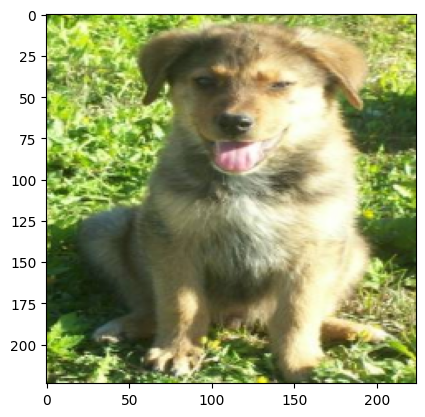

In [4]:
data = cats_dogs(train_data_dir)
im, label = data[200]

plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [5]:
def conv_layer(ni, no, kernel_size, stride=1):
    return nn.Sequential(
        nn.Conv2d(ni, no, kernel_size, stride),
        nn.ReLU(),
        nn.BatchNorm2d(no),
        nn.MaxPool2d(2)
    )

def get_model():
    model = nn.Sequential(
        conv_layer(3, 64, 3),
        conv_layer(64, 512, 3),
        conv_layer(512, 512, 3),
        conv_layer(512, 512, 3),
        conv_layer(512, 512, 3),
        conv_layer(512, 512, 3),
        nn.Flatten(),
        nn.Linear(512, 1),
        nn.Sigmoid()
    ).to(device)
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.zero_grad()
    optimizer.step()
    return batch_loss.item()

from torchsummary import summary
model, loss_fn, optimizer = get_model()
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 222, 222]           1,792
              ReLU-2         [-1, 64, 222, 222]               0
       BatchNorm2d-3         [-1, 64, 222, 222]             128
         MaxPool2d-4         [-1, 64, 111, 111]               0
            Conv2d-5        [-1, 512, 109, 109]         295,424
              ReLU-6        [-1, 512, 109, 109]               0
       BatchNorm2d-7        [-1, 512, 109, 109]           1,024
         MaxPool2d-8          [-1, 512, 54, 54]               0
            Conv2d-9          [-1, 512, 52, 52]       2,359,808
             ReLU-10          [-1, 512, 52, 52]               0
      BatchNorm2d-11          [-1, 512, 52, 52]           1,024
        MaxPool2d-12          [-1, 512, 26, 26]               0
           Conv2d-13          [-1, 512, 24, 24]       2,359,808
             ReLU-14          [-1, 512,

In [6]:
def get_data():
    train = cats_dogs(train_data_dir)
    trn_dl = DataLoader(train,batch_size=32,shuffle=True,drop_last=True)
    val = cats_dogs(test_data_dir)
    val_dl = DataLoader(val,batch_size=32,shuffle=True,drop_last=True)
    return trn_dl, val_dl

@torch.no_grad()
def val_loss(x,y,model):
    prediction = model(x)
    val_loss = loss_fn(prediction,y)
    return val_loss.item()

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [ ]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
        # print(ix)
    
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(is_correct)
        validation_loss = val_loss(x, y, model)
    
    val_epoch_accuracy = np.mean(val_epoch_accuracies)
    
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0


In [ ]:
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

epochs = np.arange(5) + 1

plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 4K data points used for training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid('off')
plt.legend()
plt.show()

# **Auto encoders**

The encoder takes in an input image and maps it to a lower dimensional representation, called the latent space. The decoder then takes this latent space representation and reconstructs the original image. Auto encoders are often used for image compression, image denoising and data generation. They can learn to capture the important features of an image, while discarding the noise and unnecessary information. 

Auto encoders have many benefits: firstly, they can be trained without labels, which mean that they can be used for unsupervised learning; Second, they can learn to represent complex data in a low-dimensional space, which can be useful for visualizing high-dimensional data; Third, they cna be used for data compression, which can reduce the storage space required for large datasets.

In [1]:
from torch_snippets import *
from torchvision.datasets import MNIST
from torchvision import transforms
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

In [3]:
trn_ds = MNIST('', transform=img_transform, train=True, download=True)
val_ds = MNIST('', transform=img_transform, train=False, download=True)

In [4]:
import torch.nn as nn
import torch

class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128), nn.ReLU(True),
            nn.Linear(128,64), nn.ReLU(True),
            nn.Linear(64,latent_dim))
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim,64),nn.ReLU(True),
            nn.Linear(64,128),nn.ReLU(True),
            nn.Linear(128,28*28),nn.Tanh())

    def forward(self,x):
        x = x.view(len(x), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(len(x), 1, 28, 28)
        return x

In [5]:
def train_batch(input,model,criterio,optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output,input)
    loss.backward()
    optimizer.step()
    return loss

@torch.no_grad()
def validate_batch(input,model,criterion):
    model.eval()
    output = model(input)
    loss = criterion(output,input)
    return loss

In [6]:
from fastprogress import master_bar, progress_bar
from fastprogress.fastprogress import Report

model = AutoEncoder(3).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(),lr=0.001,weight_decay=1e-5)

num_epochs = 5
log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(trn_dl)
    for ix, (data,_) in enumerate(trn_dl):
        loss = train_batch(data,model,criterion,optimizer)
        log.record(pos=(epoch+(ix+1)/N), trn_loss=loss, end='\r')

    N = len(val_dl)
    for ix, (data,_) in enumerate(val_dl):
        loss = validate_batch(data,model,criterion)
        log.record(pos=(epoch+(ix+1)/N),val_loss=loss,end='\r')
    log.report_avgs(epoch+1)
log.plot(log=True)

ImportError: cannot import name 'Report' from 'fastprogress.fastprogress' (C:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastprogress\fastprogress.py)

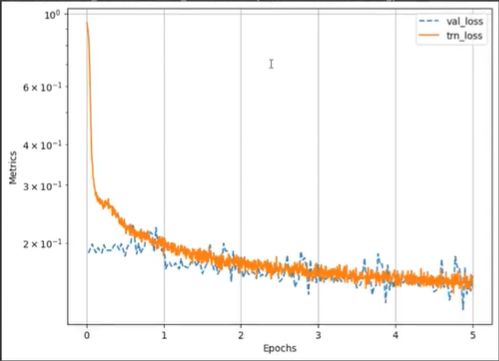

In [8]:
model = AutoEncoder(3).to(device)

for _ in range(3):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1,2,figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()

NameError: name 'plt' is not defined

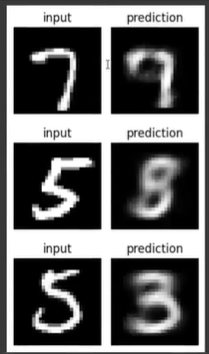

# CNN Based Auto Encoder

In [10]:
from torch_snippets import *
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

trn_ds = MNIST('/content/', transform=img_transform, train=True, download=True)
val_ds = MNIST('/content/', transform=img_transform, train=False, download=True)

batch_size = 128
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

In [11]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2), nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=2, padding=1), nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 2, stride=2, padding=1), nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = ConvAutoEncoder().to(device)
!pip install torch_summary
from torchsummary import summary
summary(model, torch.zeros(2, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 3, 3]            --
|    └─Conv2d: 2-1                       [-1, 32, 14, 14]          320
|    └─ReLU: 2-2                         [-1, 32, 14, 14]          --
|    └─MaxPool2d: 2-3                    [-1, 32, 7, 7]            --
|    └─Conv2d: 2-4                       [-1, 64, 4, 4]            18,496
|    └─ReLU: 2-5                         [-1, 64, 4, 4]            --
|    └─MaxPool2d: 2-6                    [-1, 64, 3, 3]            --
├─Sequential: 1-2                        [-1, 1, 28, 28]           --
|    └─ConvTranspose2d: 2-7              [-1, 32, 7, 7]            18,464
|    └─ReLU: 2-8                         [-1, 32, 7, 7]            --
|    └─ConvTranspose2d: 2-9              [-1, 16, 15, 15]          12,816
|    └─ReLU: 2-10                        [-1, 16, 15, 15]          --
|    └─ConvTranspose2d: 2-11             [-1, 1, 28, 28]           65
| 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 3, 3]            --
|    └─Conv2d: 2-1                       [-1, 32, 14, 14]          320
|    └─ReLU: 2-2                         [-1, 32, 14, 14]          --
|    └─MaxPool2d: 2-3                    [-1, 32, 7, 7]            --
|    └─Conv2d: 2-4                       [-1, 64, 4, 4]            18,496
|    └─ReLU: 2-5                         [-1, 64, 4, 4]            --
|    └─MaxPool2d: 2-6                    [-1, 64, 3, 3]            --
├─Sequential: 1-2                        [-1, 1, 28, 28]           --
|    └─ConvTranspose2d: 2-7              [-1, 32, 7, 7]            18,464
|    └─ReLU: 2-8                         [-1, 32, 7, 7]            --
|    └─ConvTranspose2d: 2-9              [-1, 16, 15, 15]          12,816
|    └─ReLU: 2-10                        [-1, 16, 15, 15]          --
|    └─ConvTranspose2d: 2-11             [-1, 1, 28, 28]           65
| 

In [12]:
def train_batch(input,model,criterion,optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss

@torch.no_grad()
def validate_batch(input,model,criterion):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss

model = ConvAutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.001, weight_decay=1e-5)

In [24]:
from fastprogress import master_bar, progress_bar

num_epochs = 5
log = master_bar(range(num_epochs))

for epoch in log:
    log.write(f"Epoch {epoch + 1}/{num_epochs} started.")
    
    N = len(trn_dl)
    for ix, (data, _) in enumerate(progress_bar(trn_dl, parent=log)):
        loss = train_batch(data, model, criterion, optimizer)
        log.child.comment = f"Training Loss: {loss:.4f}"

    N = len(val_dl)
    for ix, (data, _) in enumerate(progress_bar(val_dl, parent=log)):
        loss = validate_batch(data, model, criterion)
        log.child.comment = f"Validation Loss: {loss:.4f}"
        

    log.write(f"Epoch {epoch + 1}/{num_epochs} completed.")

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

latent_vectors = []
classes = []

for im,clss in val_dl:
    latent_vectors.append(model.encoder(im).view(len(im)-1))
    classes.extend(clss)

latent_vectors = torch.cat(latent_vectors).cpu().detach().numpy()

tsne = TSNE(2)
clustered = tsne.fit_transform(latent_vectors)

fig = plt.figure(figsize=(12,10))
cmap = plt.get_cmap('Spectral', 10)
plt.scatter(*zip(*clustered), c=classes, cmap=cmap)
plt.colorbar(drawedges=True)

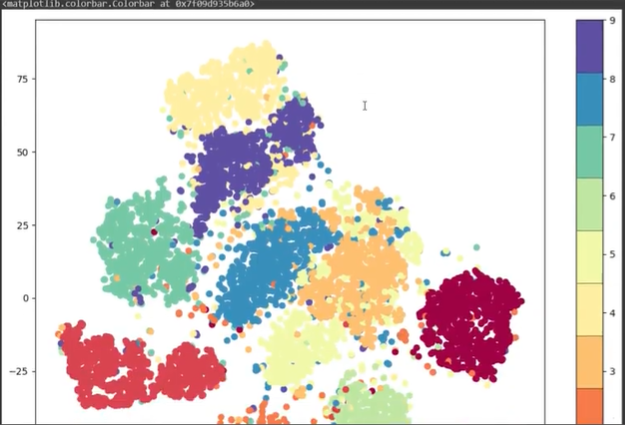

# Introduction to Variational Auto Encoders (VAE)

VAEs are a type of autoencoder that incorporates Bayesian inference into the learning process. In a VAE, the encoder gerenates a mean vector and a variance vector, which are used to sample latent variables.

During its training, it minimizes the reconstruction error in a similar way to an autoencoder, but also maximizes a lower bound on the log-likelihood of the data. This lower bound is based on the Kullback-Leibler divergence between the learned distribution and the true distribution.

VAEs produce more natural-looking reconstructions than normal Autoencoders, because they can sample from the learned distribution to generate new examples.

Basically, they are used to generate new images by sampling from the learned distributions, and then using the decoder to generate a new image.

In [2]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Encoder network
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc21 = nn.Linear(256, 20)  # mu
        self.fc22 = nn.Linear(256, 20)  # logvar

        # Decoder network
        self.fc3 = nn.Linear(20, 256)
        self.fc4 = nn.Linear(256, 64 * 7 * 7)
        self.deconv1 = nn.ConvTranspose2d(d64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1)

    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        mu = self.fc21(x)
        logvar = self.fc22(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = Variable(torch.randn(std.size()).cuda())
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        z = F.relu(self.fc3(z))
        z = F.relu(self.fc4(z))
        z = z.view(z.size(0), 64, 7, 7)
        z = F.relu(self.deconv1(z))
        z = torch.sigmoid(self.deconv2(z))
        return z

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        z = self.decode(z)
        return z, mu, logvar

In [3]:
def train_batch(data,model,optimizer,loss_function):
    model.train()
    data = data.to(device)
    optimizer.zero_grad()
    recon_batch, mean, log_var = model(data)
    loss,mse,kld = loss_function(recon_batch, data, mean, log_var)
    loss.backward()
    optimizer.step()
    return loss, mse, kld, log_var.mean(), mean.mean()

@torch.no_grad()
def validate_batch(data,model,loss_function):
    model.eval()
    data = data.to(device)
    recon,mean,log_var = model(data)
    loss, mse, kld = loss_function(recon,data,mean,log_var)
    return loss, mse, kld, log_var.mean(), mean.mean()

In [4]:
def loss_function(recon_x, x, mean, log_var):
    RECON = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1+log_var-mean.pow(2) - log_var.exp())
    return RECON + KLD, RECON, KLD

In [12]:
class Report:
    def __init__(self, n_epochs):
        self.n_epochs = n_epochs
        self.records = []

    def record(self, pos, **kwargs):
        self.records.append((pos, kwargs))

    def report_avgs(self, epoch):
        avg_records = {key: sum([rec[1].get(key, 0) for rec in self.records])/len(self.records)
                       for key in self.records[0][1].keys()}
        print(f"Epoch {epoch} averages:")
        for key, value in avg_records.items():
            print(f"{key}: {value:.4f}")
        self.records.clear()

In [14]:
n_epochs = 10
log = Report(n_epochs)
vae = VAE().to(device)
optimizer = optim.AdamW(vae.parameters(),lr=1e-3)

for epoch in range(n_epochs):
    N = len(train_loader)
    for batch_idx, (data,_) in enumerate(train_loader):
        loss, recon, kld, log_var, mean = train_batch(data, vae, optimizer, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, train_loss=loss, train_kld=kld, train_recon=recon, train_log_var=log_var, train_mean=mean, end='\r')

    N = len(test_loader)
    for batch_idx, (data,_) in enumerate(test_loader):
        loss, recon, kld, log_var, mean = validate_batch(data, vae, loss_function)
        pos = epoch+(1+batch_idx)/N
        log.record(pos, val_loss=loss, val_kld=kld, val_recon=recon, val_log_var=log_var, val_mean=mean, end='\r')

    log.report_avgs(epoch+1)
    with torch.no_grad():
        z = torch.randn(64,20).to(device)
        sample = vae.decode(z).to(device)
        images = make_grid(sample.view(64,1,28,28)).permute(1,2,0)
        show(images)

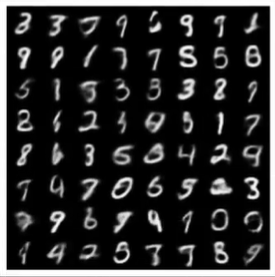

# Neural Style Transfer

In [1]:
from torch_snippets import *
from torchvision import transforms as T
from torch.nn import functional as F
from torchvision.models import vgg19
import torch.nn as nn
device = 'cpu'

In [2]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
    T.Lambda(lambda x: x.mul_(255))
])
postprocess = T.Compose([
    T.Lambda(lambda x: x.mul_(1./255)),
    T.Normalize(mean=[-0.485/0.229, -0.456/0.224,-0.406/0.225], std=[1/0.229,1/0.224,1/0.255]),
])

In [3]:
class GramMatrix(nn.Module):
    def forward(self,input):
        b,c,h,w = input.size()
        feat = input.view(b,c,h*w)
        G = feat@feat.transpose(1,2)
        G.div_(h*w)
        return G
class GramMSELoss(nn.Module):
    def forward(self,input,target):
        out = F.mse_loss(GramMatrix()(input),target)
        return(out)
class vgg19_modified(nn.Module):
    def __init__(self):
        super().__init__()
        features = list(vgg19(pretrained=True).features)
        self.features = nn.ModuleList(features).eval()
    
    def forward(self, x, layers=[]):
        if not layers:
            return x
        order = np.argsort(layers)
        _results, results = [], []
        
        for ix, model in enumerate(self.features):
            x = model(x)
            if ix in layers:
                _results.append(x)
        
        # Organizar os resultados na ordem especificada por `order`
        for o in order:
            results.append(_results[o])
        
        return results

In [4]:
vgg = vgg19_modified().to(device)

C:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
imgs = [Image.open(path).resize((512,512)).convert('RGB') for path in ['Fall_2022_web-images_Picasso_32.jpg',
                                                                       'how-to-draw-an-elephant-featured-image-1200-1024x822.png']]
style_image, content_image = [preprocess(img).to(device)[None] for img in imgs]

In [6]:
opt_img = content_image.data.clone()
opt_img.requires_grad = True

In [7]:
style_layers = [0, 5, 10, 19, 28]
content_layers = [21]
loss_layers = style_layers + content_layers

In [8]:
loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers)
loss_fns = [loss_fn.to(device) for loss_fn in loss_fns]

In [9]:
style_weights = [1000/n**2 for n in [64,128,256,512,512]]
content_weights = [1]
weights = style_weights + content_weights

In [10]:
style_target = [GramMatrix()(A).detach() for A in vgg(style_image, style_layers)]
content_targets = [A.detach() for A in vgg(content_image, content_layers)]
targets = style_target + content_targets

In [11]:
import torch.optim as optim
max_iters = 500
optimizer = optim.LBFGS([opt_img])

In [12]:
iters = 0
while iters < max_iters:
    def closure():
        global iters
        iters += 1
        optimizer.zero_grad()
        out = vgg(opt_img, loss_layers)
        layer_losses = [weights[a] * loss_fns[a](A, targets[a]) for a,A in enumerate(out)]
        loss = sum(layer_losses)
        loss.backward()
        return loss
    optimizer.step(closure)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0274308..1.8540617].


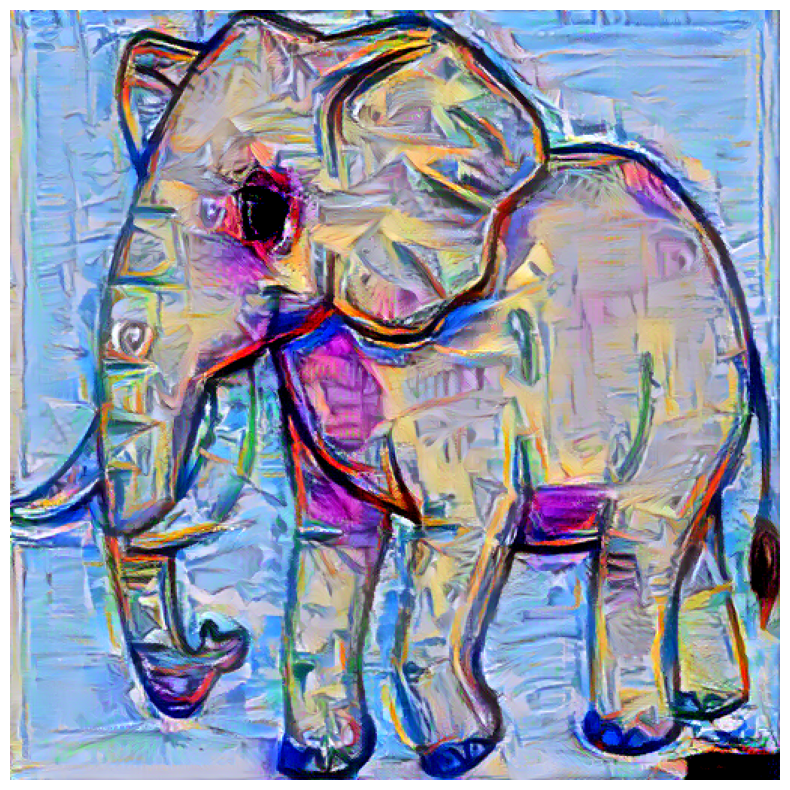

In [13]:
import torch

with torch.no_grad():
    out_img = postprocess(opt_img[0]).permute(1,2,0)

show(out_img)

# Image Colorization

In [1]:
from torch_snippets import *
device = 'cpu'

In [5]:
from torchvision import datasets
import torchvision
import torch
import torch.nn as nn

data_folder = '~/CIFAR/'
datasets.CIFAR10(data_folder, download=True)

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C:\Users\pedro/CIFAR/
    Split: Train

In [7]:
from torch.utils.data import Dataset, DataLoader

class Colorize(torchvision.datasets.CIFAR10):
    def __init__(self, root, train):
        super().__init__(root,train)
    def __getitem__(self,ix):
        im,_ = super().__getitem__(ix)
        bw = im.convert('L').convert('RGB')
        bw, im = np.array(bw)/255., np.array(im)/255.
        bw, im = [torch.tensor(i).permute(2,0,1).to(device).float() for i in [bw,im]]
        return bw, im

trn_ds = Colorize(data_folder, train=True)
val_ds = Colorize(data_folder, train=False)

trn_dl = DataLoader(trn_ds, batch_size=256, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=256, shuffle=False)

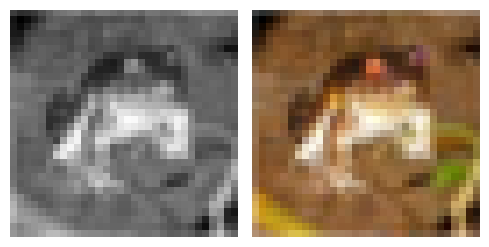

In [8]:
a,b = trn_ds[0]
subplots([a,b], nc=2)

In [21]:
class Identity(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return x

class DownConv(nn.Module):
    def __init__(self, ni, no, maxpool=True):
        super().__init__()
        self.model = nn.Sequential(
            nn.MaxPool2d(2) if maxpool else Identity(),
            nn.Conv2d(ni, no, 3, padding=1),
            nn.BatchNorm2d(no),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(no,no,3,padding=1),
            nn.BatchNorm2d(no),
            nn.LeakyReLU(0.2, inplace=True),
        )
    def forward(self, x):
        return self.model(x)

class UpConv(nn.Module):
    def __init__(self, ni, no, maxpool=True):
        super().__init__()
        self.convtranspose = nn.ConvTranspose2d(ni, no, 2, stride=2)
        self.convlayers = nn.Sequential(
            nn.Conv2d(no+no, no, 3, padding=1),
            nn.BatchNorm2d(no),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(no, no, 3, padding=1),
            nn.BatchNorm2d(no),
            nn.LeakyReLU(0.2, inplace=True),
        )
    def forward(self, x, y):
        x = self.convtranspose(x)
        x = torch.cat([x,y], axis=1)
        x = self.convlayers(x)
        return x

class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Down-sampling layers
        self.d1 = DownConv(3, 64, maxpool=False)
        self.d2 = DownConv(64, 128)
        self.d3 = DownConv(128, 256)
        self.d4 = DownConv(256, 512)
        self.d5 = DownConv(512, 1024)
        
        # Up-sampling layers
        self.u5 = UpConv(1024, 512)
        self.u4 = UpConv(512, 256)
        self.u3 = UpConv(256, 128)
        self.u2 = UpConv(128, 64)
        
        # Final output layer
        self.u1 = nn.Conv2d(64, 3, kernel_size=1, stride=1)
    
    def forward(self, x):
        # Down-sampling
        x0 = self.d1(x)
        x1 = self.d2(x0)
        x2 = self.d3(x1)
        x3 = self.d4(x2)
        x4 = self.d5(x3)
        
        # Up-sampling
        X4 = self.u5(x4, x3)
        X3 = self.u4(X4, x2)
        X2 = self.u3(X3, x1)
        X1 = self.u2(X2, x0)
        X0 = self.u1(X1)
        
        return X0

In [22]:
from torch import optim

def get_model():
    model = UNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.MSELoss()
    return model, optimizer, loss_fn

In [ ]:
def train_batch(model, data, optimizer, criterion):
    model.train()  # Set model to training mode
    x, y = data  # Unpack input (x) and target (y)
    _y = model(x)  # Generate predictions
    optimizer.zero_grad()  # Clear previous gradients
    loss = criterion(_y, y)  # Calculate loss
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights
    return loss.item()  # Return loss as a scalar

@torch.no_grad()  # Disable gradient computations
def validate_batch(model, data, criterion):
    model.eval()  # Set model to evaluation mode
    x, y = data  # Unpack input (x) and target (y)
    _y = model(x)  # Generate predictions
    loss = criterion(_y, y)  # Calculate loss
    return loss.item()  # Return loss as a scalar


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27025545..1.1254473].


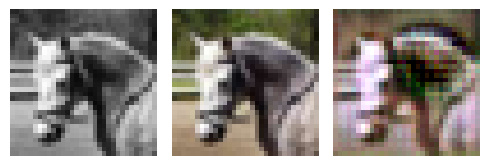

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3950252..1.5788437].


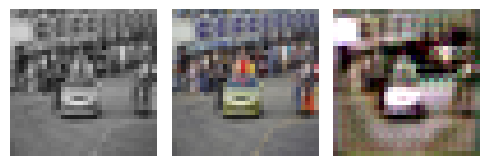

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21053651..1.3330323].


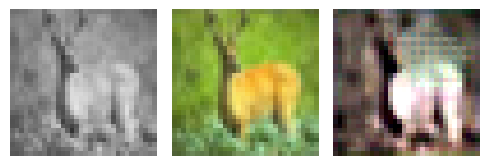

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.35325217..1.1351217].


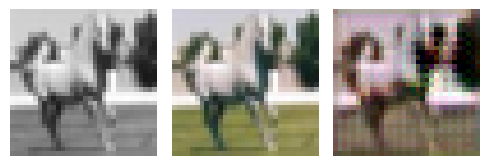

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20079914..0.89504635].


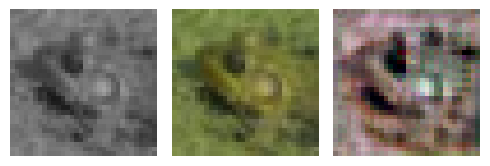

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09732953..1.1341096].


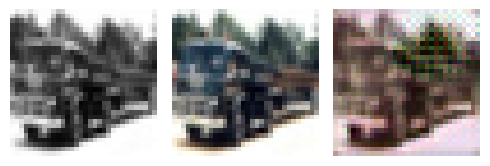

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18823317..1.0239999].


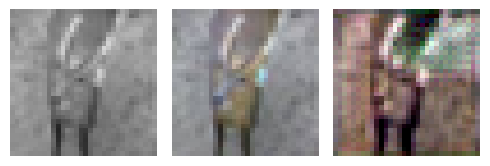

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19739537..1.2899098].


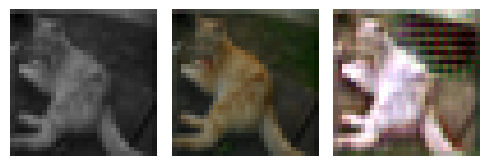

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22496961..1.0711381].


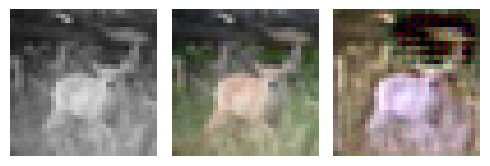

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27049056..1.2672331].


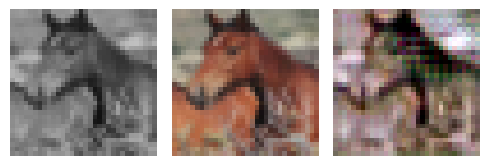

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.011984623..1.0297765].


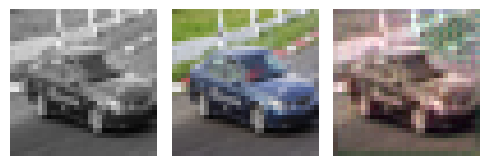

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.01322101..1.0165288].


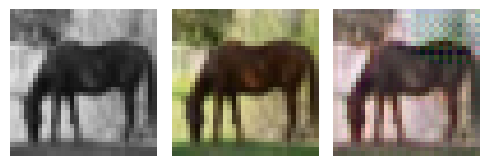

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.16299003..1.0641495].


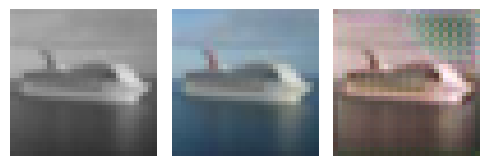

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31142777..1.4850044].


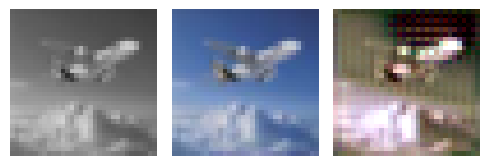

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.121822916..1.1770136].


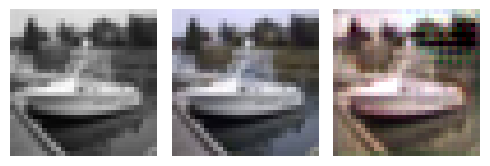

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.009644119..1.0129064].


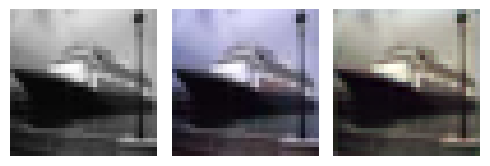

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.013133193..1.0247927].


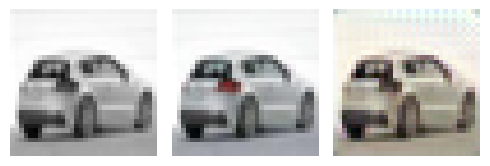

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0034763..1.0772057].


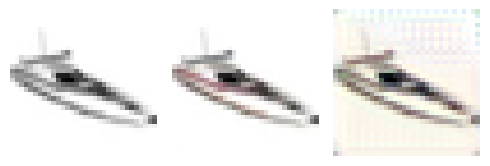

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.029945895..1.0120602].


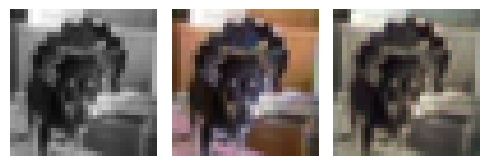

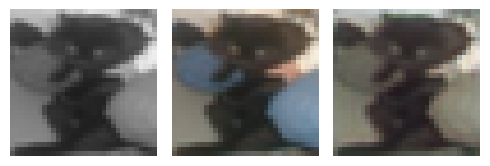

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2247249..0.9431629].


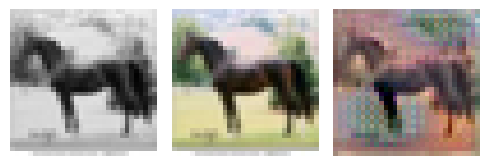

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1564948..0.813052].


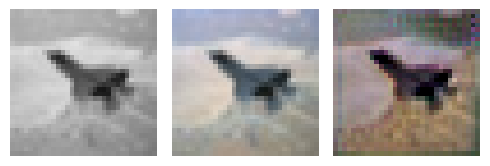

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21250786..1.1803621].


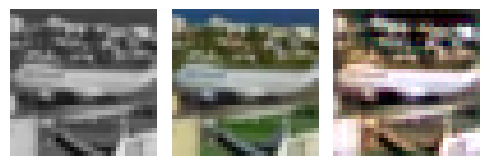

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.109114915..1.219534].


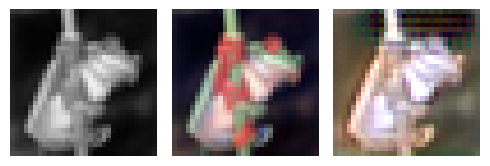

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.009716253..1.0943924].


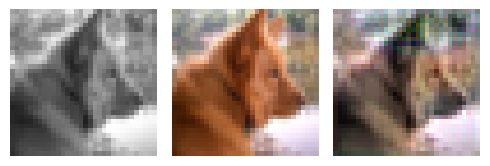

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24098054..1.2616225].


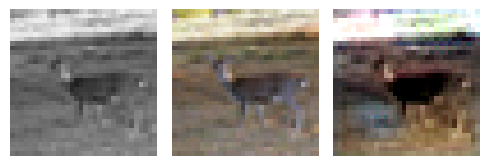

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17923991..0.9344692].


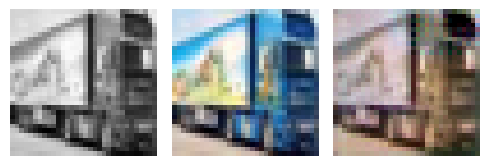

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18021785..1.3012133].


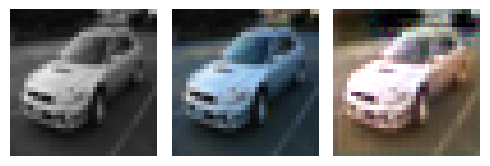

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11838338..0.88278246].


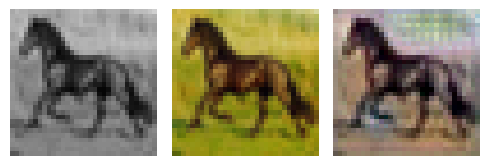

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18137185..1.1690755].


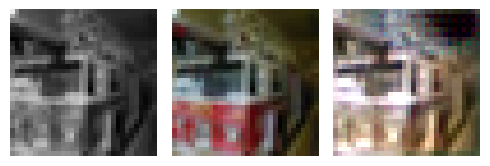

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22480246..0.8130899].


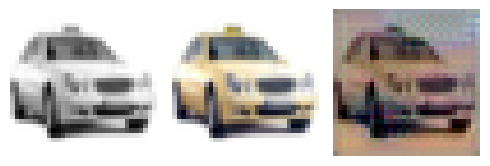

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06536555..1.2419121].


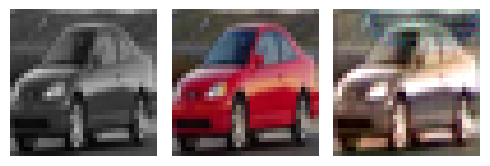

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13474523..0.732795].


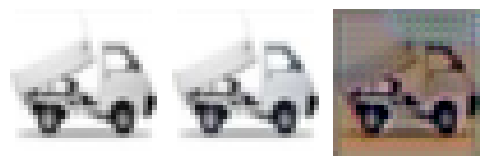

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3994749..0.9705526].


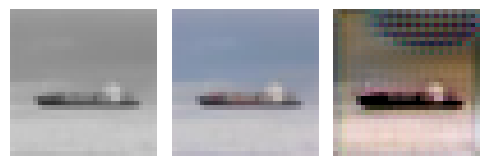

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20849629..1.2157091].


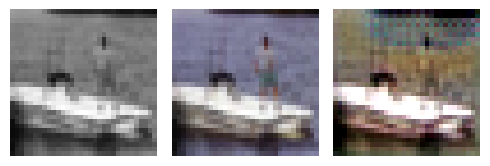

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.057758097..1.0163267].


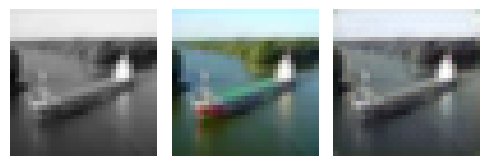

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.011282826..0.9300147].


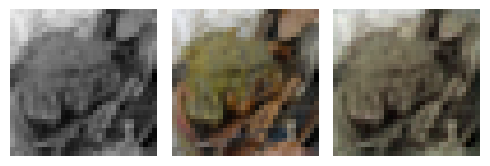

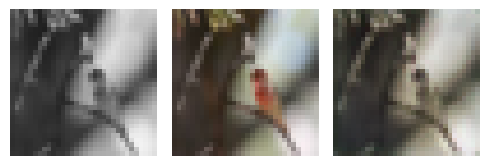

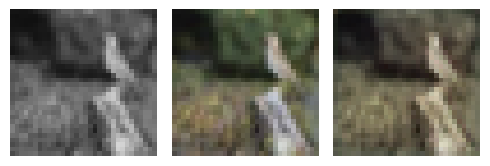

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10791863..1.0661514].


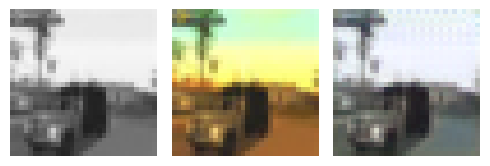

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17803043..0.92543167].


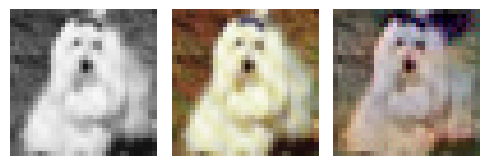

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31583163..1.0648512].


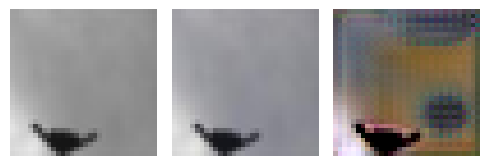

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11887964..1.0182945].


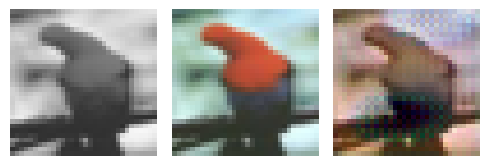

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14301252..1.5600009].


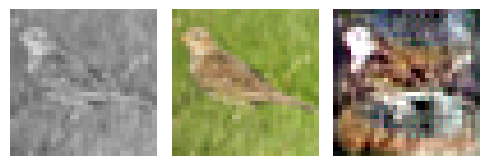

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18489149..1.2468286].


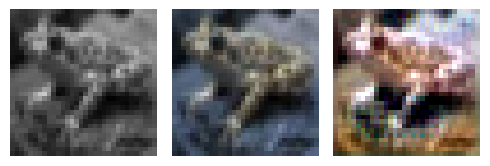

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16086608..0.876141].


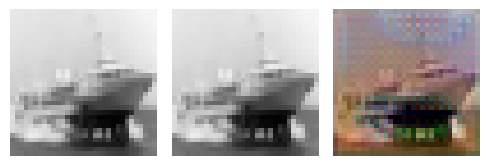

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4873564..1.117146].


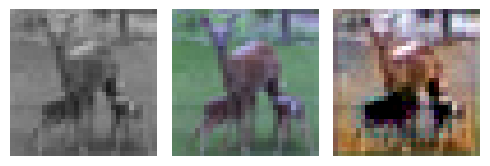

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.027126014..1.2399644].


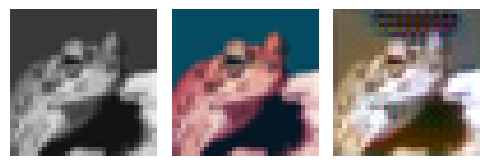

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.55498827..1.0721527].


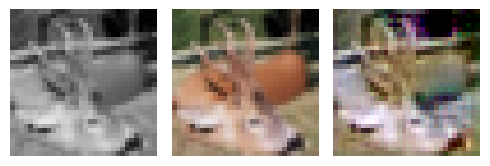

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3841079..0.9905857].


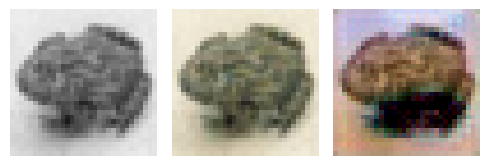

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27178055..1.1613544].


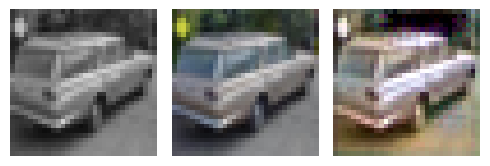

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.085709594..1.7955934].


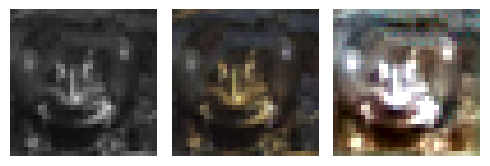

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08047936..0.98280996].


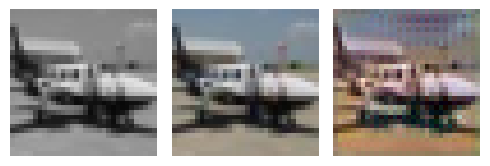

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08724724..1.6857132].


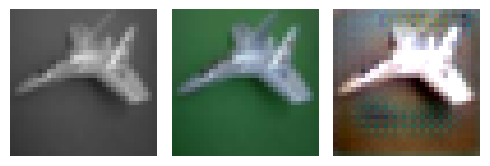

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1233937..0.8159767].


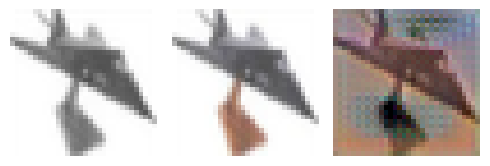

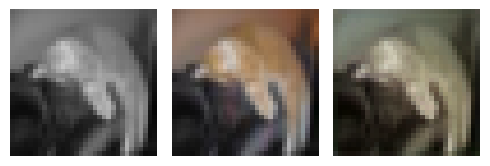

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.034528032..0.98470134].


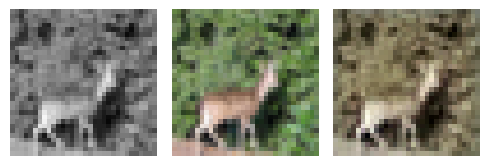

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04365755..1.0452528].


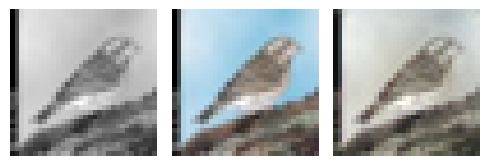

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030190289..1.053559].


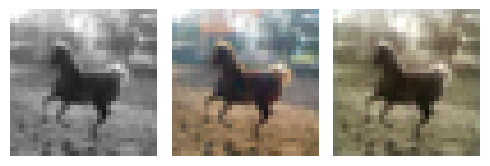

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.060966227..1.0190271].


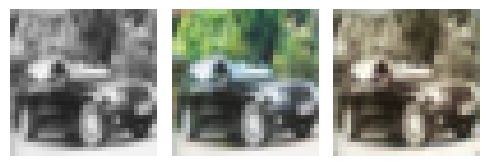

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45204037..1.3928608].


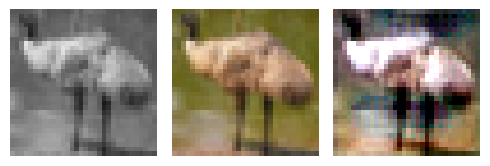

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13016993..1.2398967].


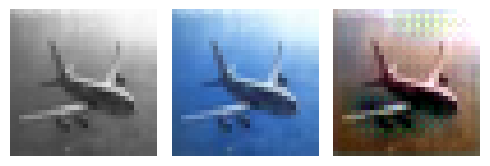

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27159405..1.3611393].


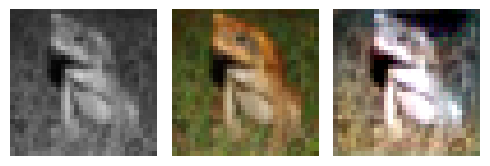

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13501003..1.1617703].


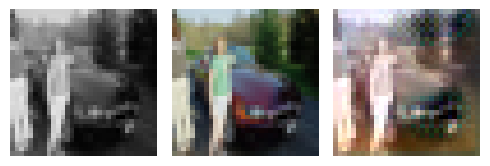

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09187163..1.0698118].


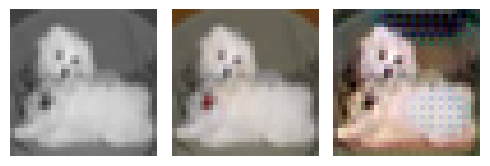

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15737362..1.197879].


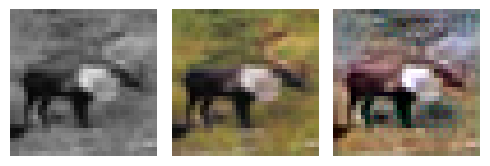

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12597951..1.0567633].


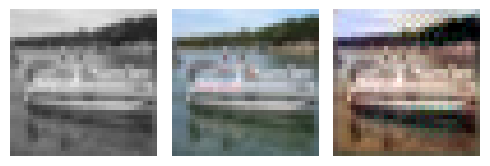

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12518421..1.4297489].


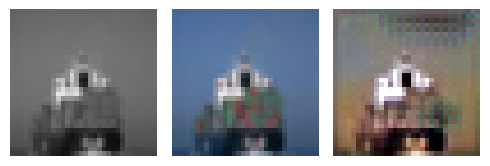

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17629367..0.92270255].


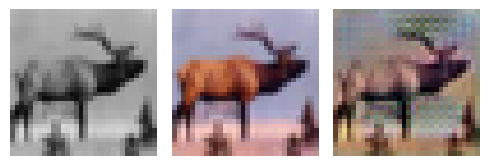

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5270616..1.8982836].


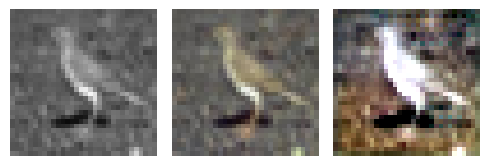

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27014697..0.8986798].


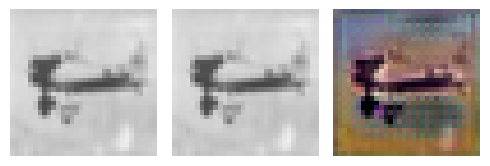

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19247676..0.95691264].


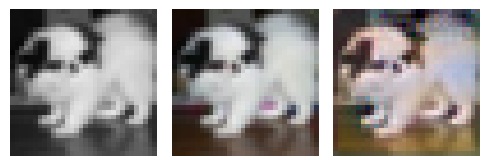

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16134806..0.9901441].


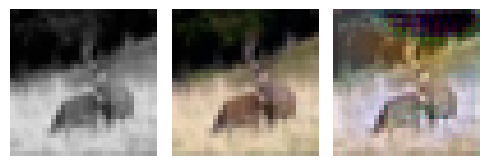

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.29017475..1.575042].


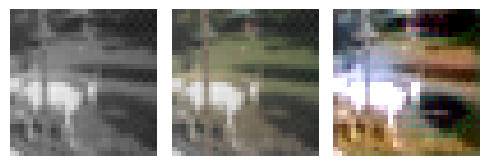

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5614527..1.1065562].


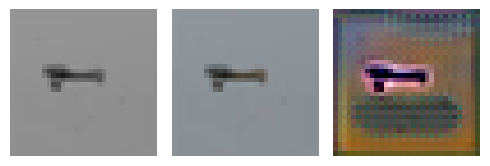

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5429985..1.8141253].


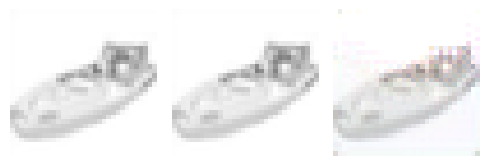

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.14433001..1.020801].


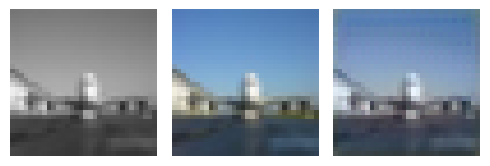

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.061672058..1.2351376].


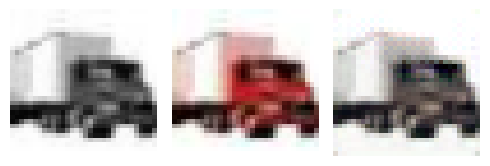

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.12995307..1.1276786].


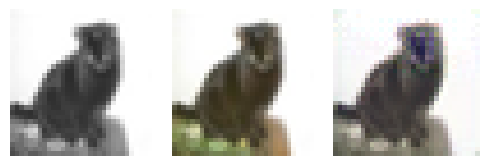

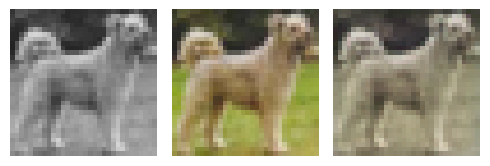

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.015119635..0.98013276].


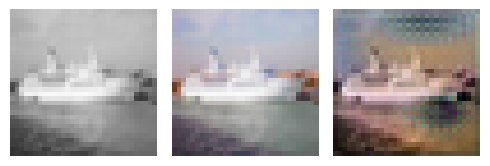

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12547159..1.5320382].


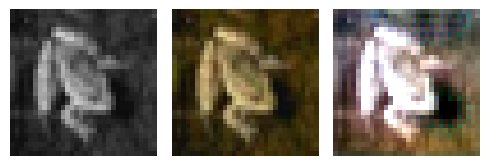

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3325166..0.9246889].


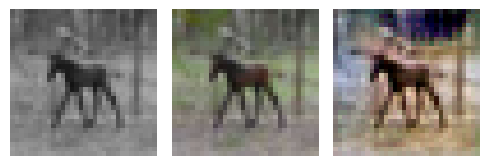

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5571853..0.89269525].


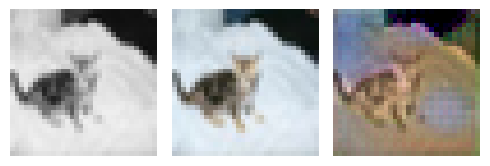

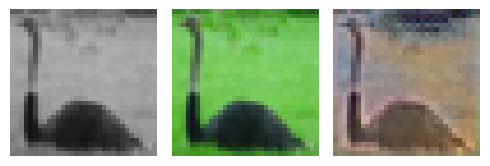

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07661671..0.9942201].


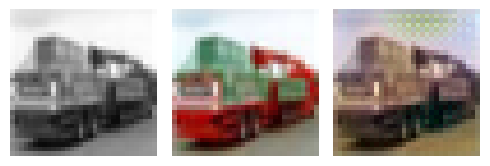

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.034153778..1.0029306].


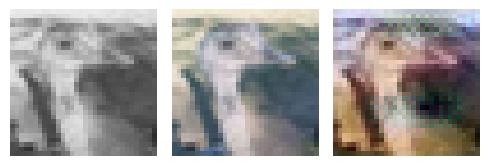

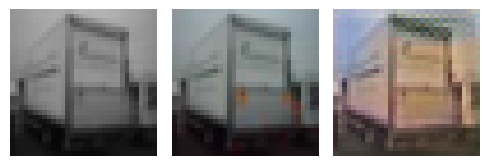

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05563099..1.4199246].


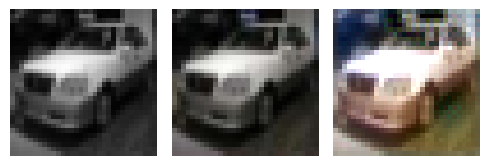

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24286933..0.9835699].


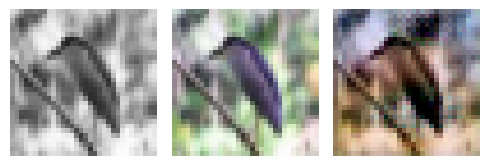

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4640631..1.1021618].


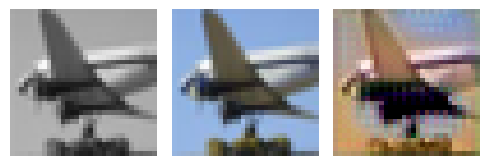

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21342081..1.082445].


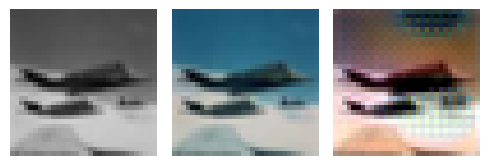

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12089982..1.5896927].


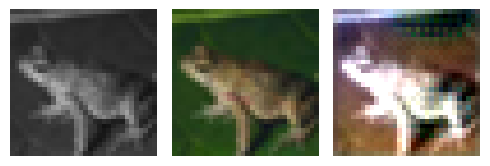

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.180397..1.1642113].


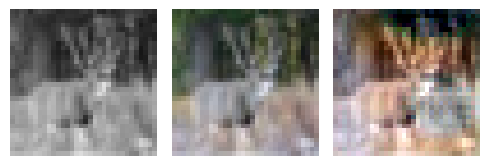

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43602014..1.271358].


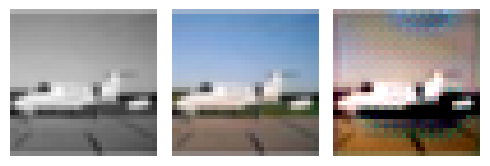

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.019976847..1.0101333].


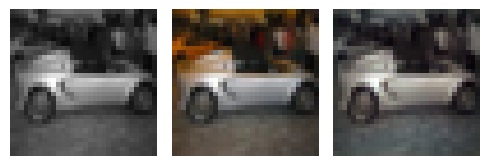

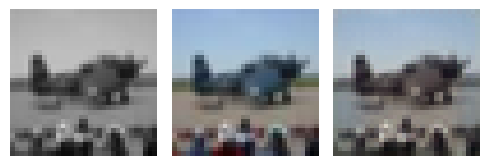

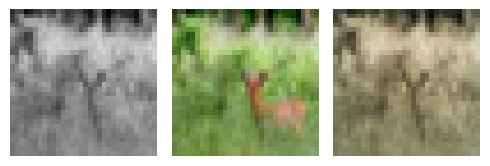

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.012547462..1.0312781].


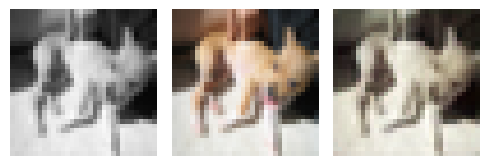

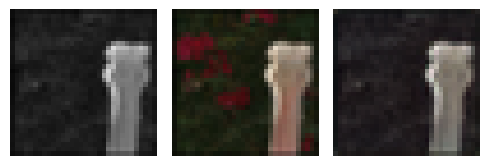

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.049331624..1.1878463].


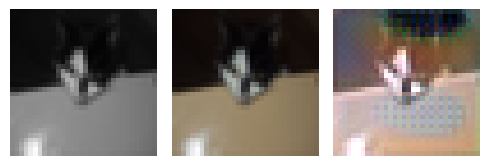

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.096996665..1.0026677].


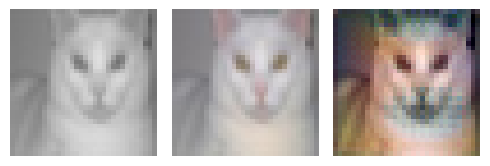

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.40298018..1.2353355].


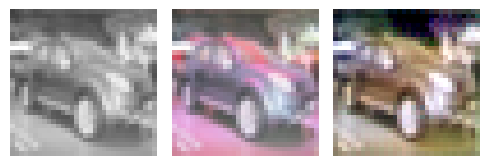

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08374463..0.949781].


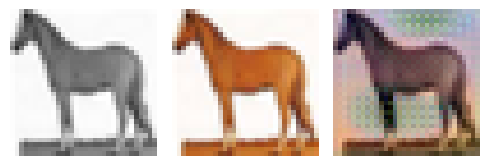

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13719897..1.0353541].


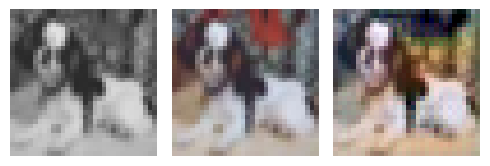

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.051058482..1.3237543].


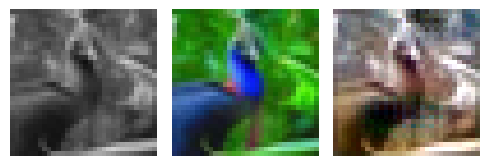

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31296903..1.3637724].


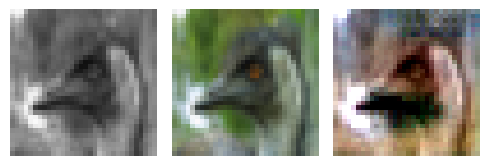

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.105921805..1.0738364].


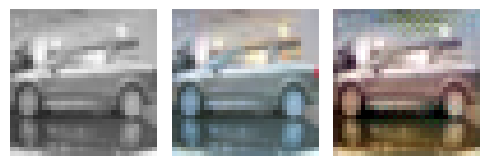

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.032725766..0.83739763].


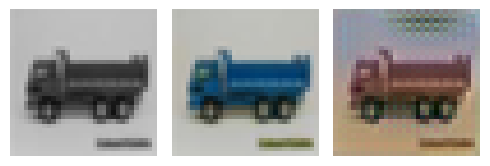

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09975467..1.0884572].


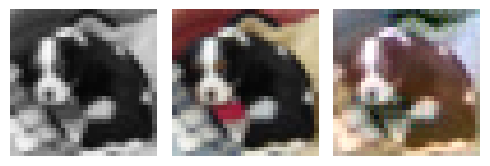

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5079344..0.85806704].


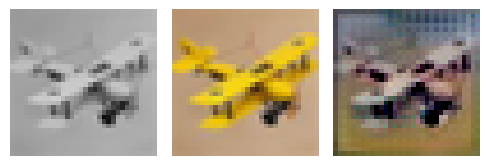

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17935555..1.1042738].


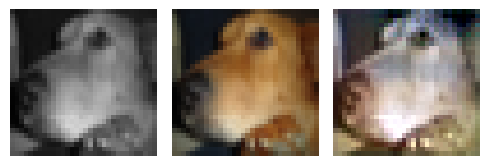

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14894922..1.1147394].


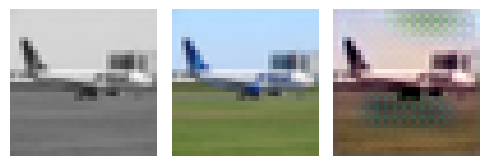

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42173496..1.2477522].


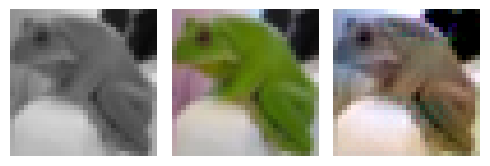

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1228714..1.2472721].


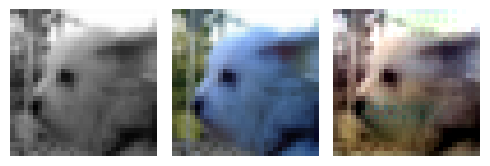

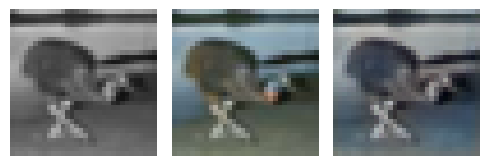

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.14334795..1.1146809].


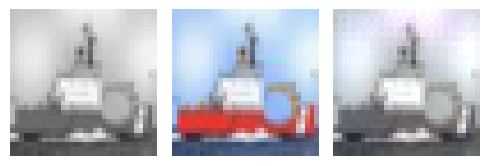

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.039171845..0.9607655].


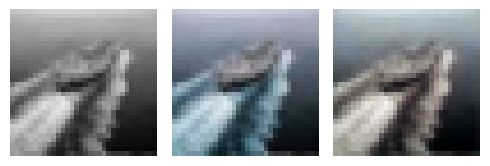

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04790672..1.0335073].


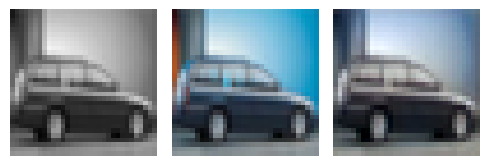

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.038113452..1.053425].


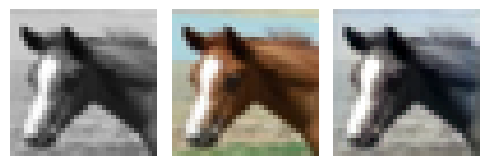

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45398262..1.0341636].


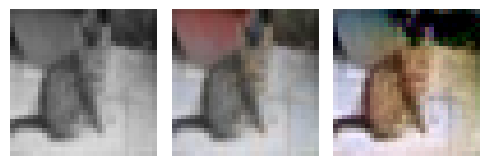

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.83534104..1.0767753].


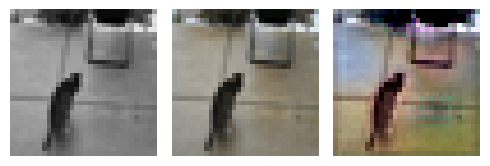

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43931952..1.0547844].


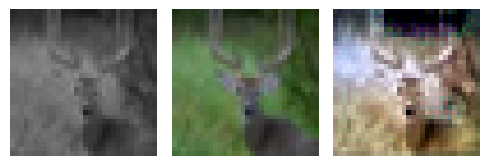

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.084491454..1.7322114].


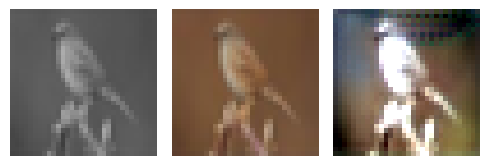

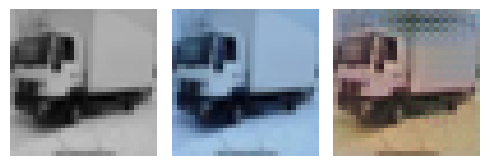

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15229698..0.9286227].


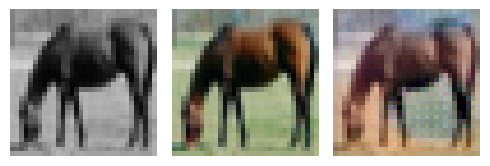

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.448227..0.92584825].


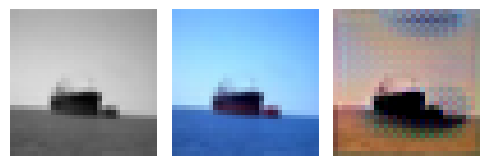

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.35509735..1.8480105].


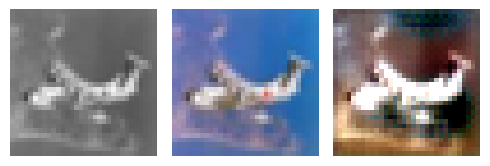

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10449344..0.9245136].


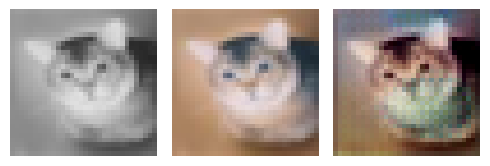

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23920253..1.4962707].


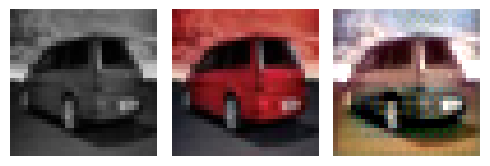

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27714792..1.1472379].


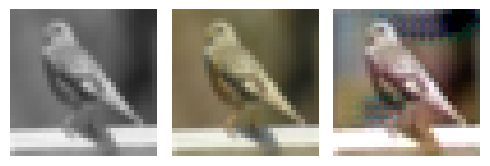

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.010557231..1.2122467].


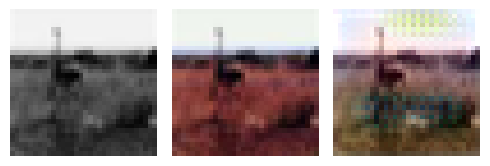

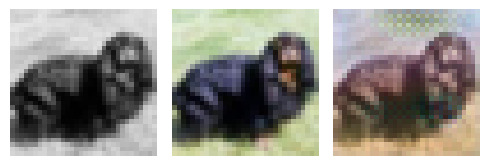

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08111551..1.0638974].


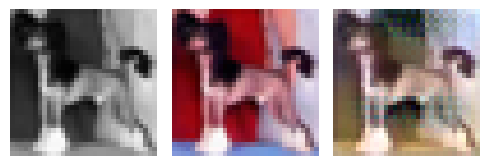

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.052726913..1.0787606].


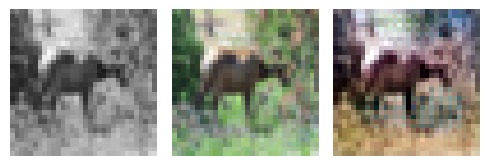

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.096546344..1.0513903].


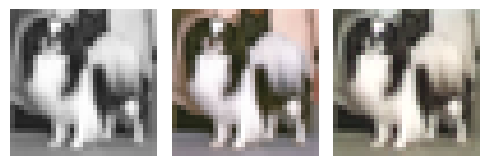

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.18013954..1.0546218].


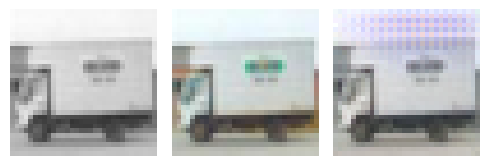

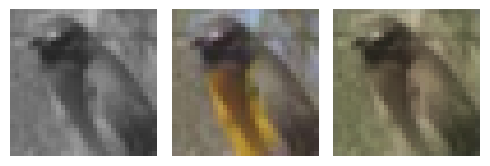

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.018289443..1.0059832].


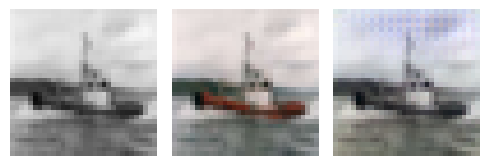

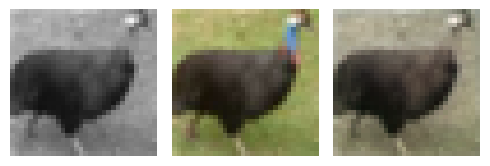

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14597689..1.3637288].


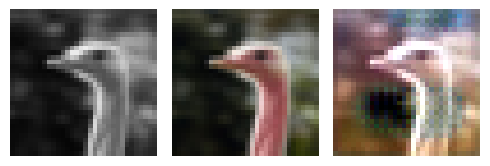

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.121268444..1.2000239].


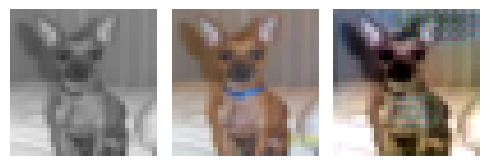

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.014876163..1.0425471].


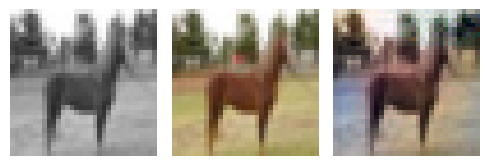

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11446072..1.053694].


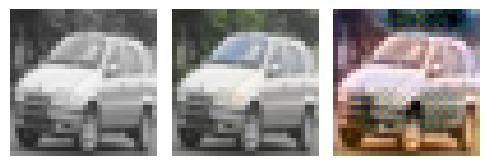

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2209163..1.2476573].


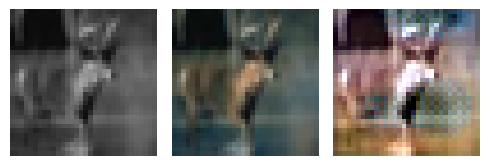

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20318748..1.5138205].


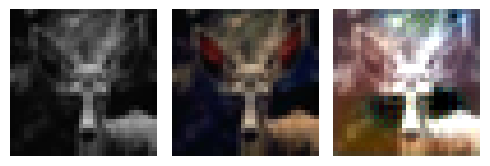

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37259609..0.9160921].


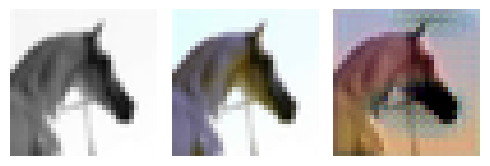

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17130545..1.0605628].


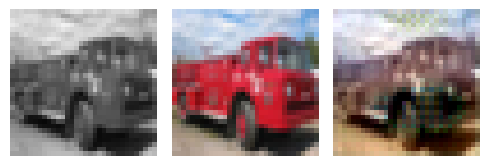

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.29370916..0.9651254].


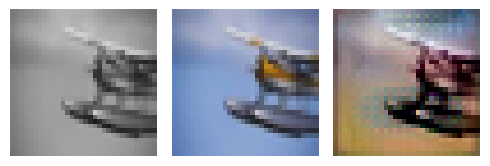

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2704819..1.7210635].


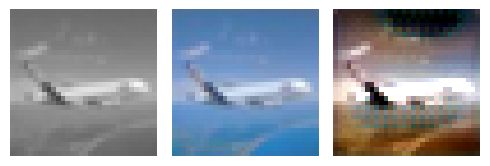

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.074141786..1.3309022].


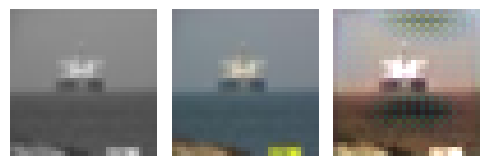

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.012284596..1.0500365].


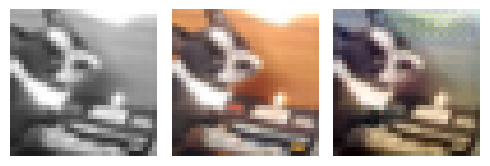

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22371343..0.9586982].


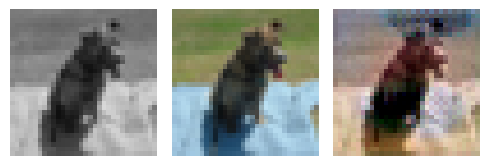

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04122559..0.89696395].


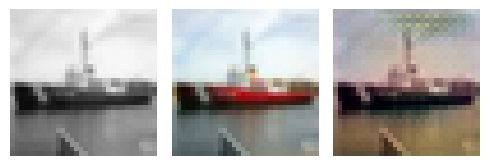

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4958781..1.2817734].


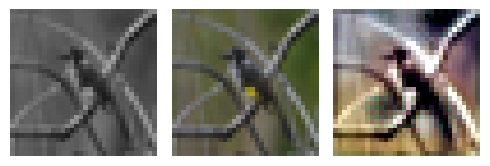

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.007962765..1.0032734].


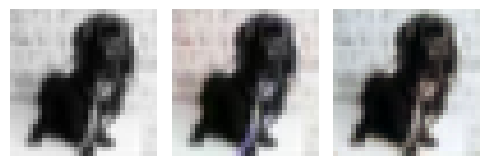

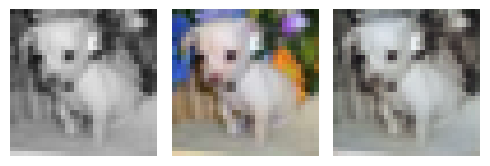

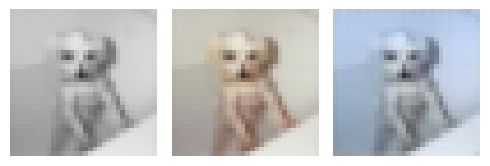

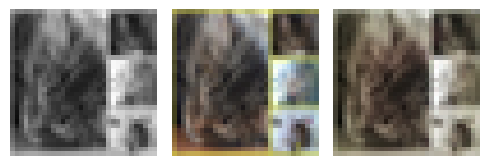

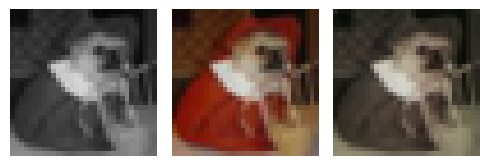

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20263384..1.1617156].


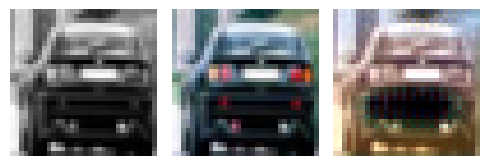

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19924864..1.2695242].


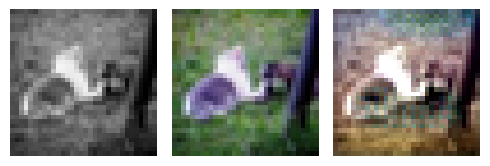

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.35466558..0.93402886].


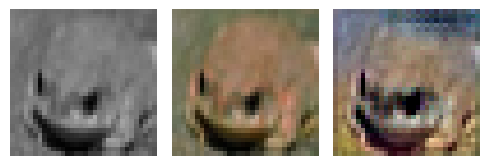

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2232784..1.3942938].


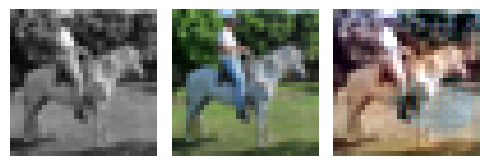

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.025998283..0.8407545].


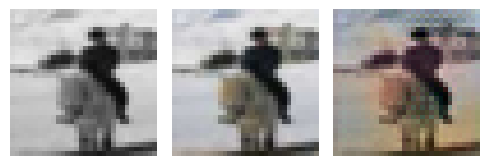

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.040810894..0.92211854].


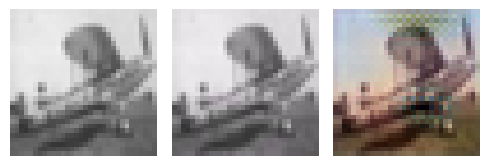

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.007778186..1.1965109].


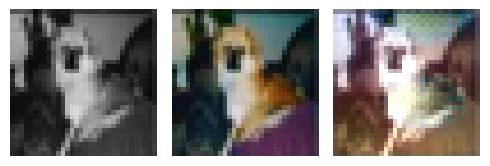

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.39804873..1.1420317].


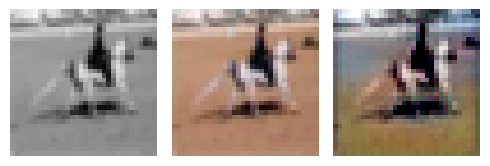

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26123318..1.5190661].


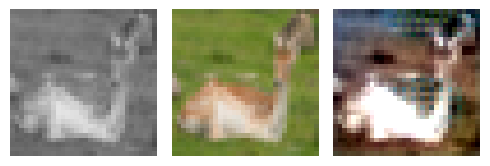

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26935586..1.351122].


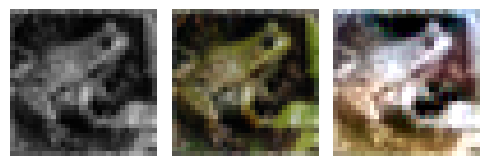

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.041837167..1.2504863].


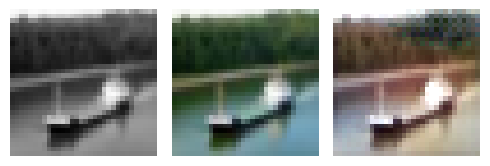

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.051435538..0.9414148].


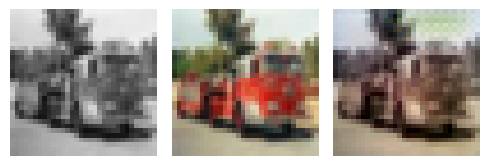

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06865974..1.1034976].


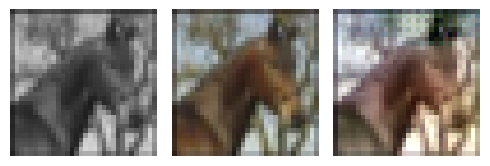

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08436745..1.1213129].


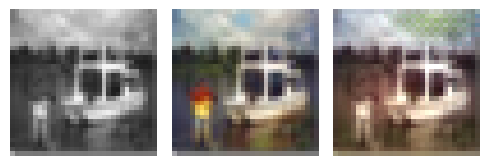

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1725919..1.6159165].


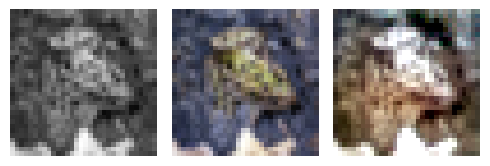

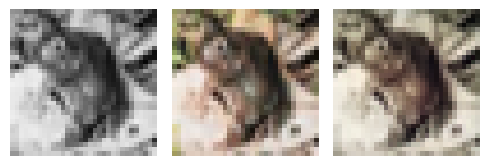

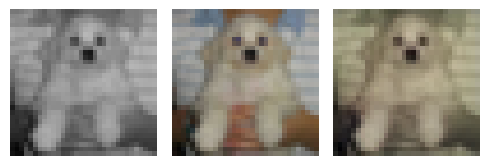

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.19502808..1.0081867].


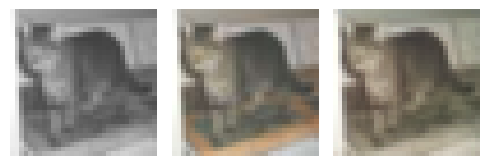

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37609848..1.1213183].


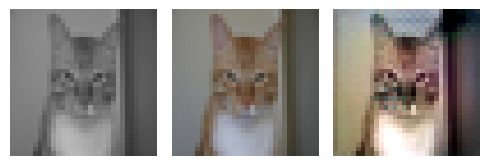

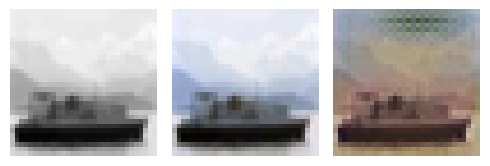

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.007838252..1.0752608].


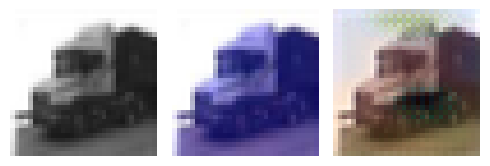

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05073861..0.8297432].


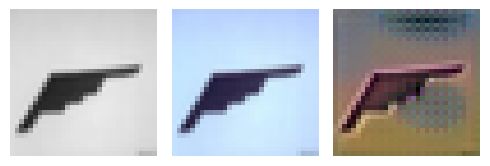

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.011893378..1.0290368].


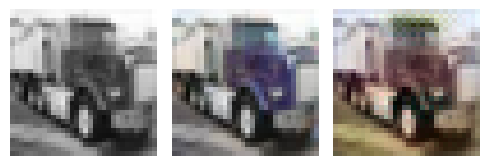

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.046448022..0.8832566].


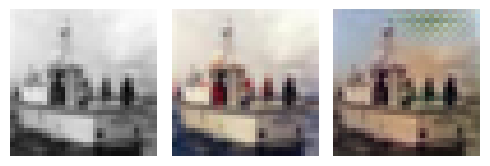

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.01496254..0.9786687].


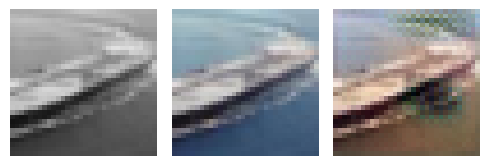

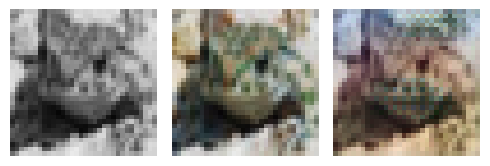

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11869411..1.361984].


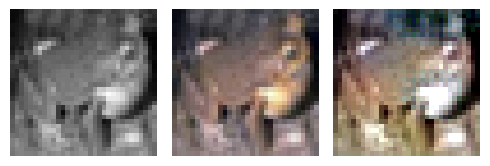

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09848019..0.91439533].


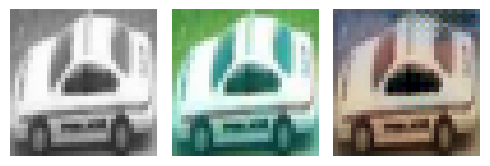

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.60687435..1.3298635].


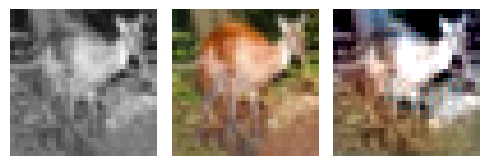

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06901888..1.0879407].


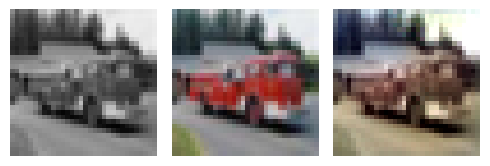

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.096481755..1.3386029].


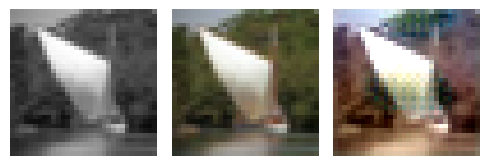

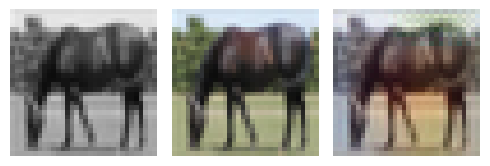

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3097677..1.1847514].


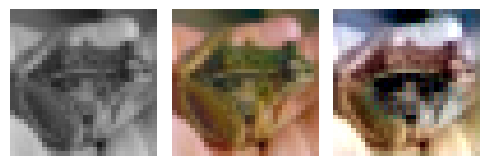

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00021025533..1.0094268].


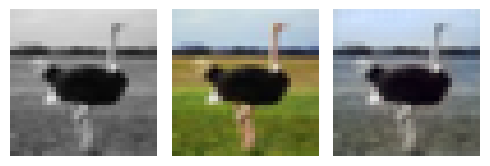

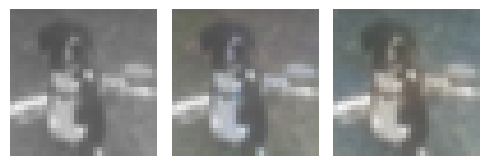

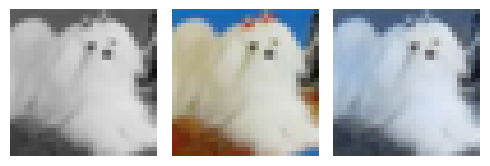

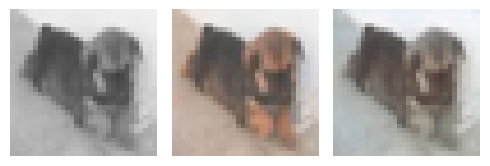

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0033554982..1.0946939].


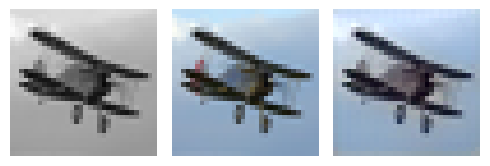

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14917783..1.3958396].


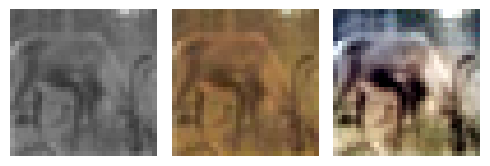

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.035602223..1.1087788].


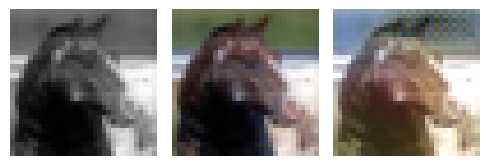

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08064714..1.019508].


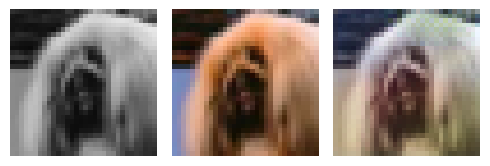

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3230816..0.76830024].


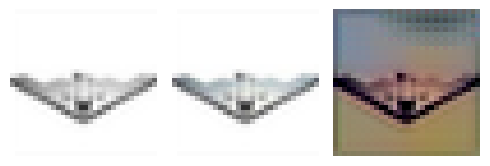

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.30723265..1.1216643].


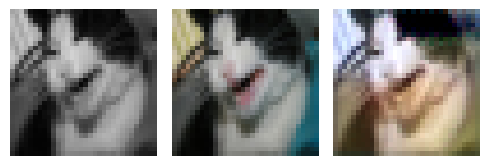

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11989316..0.7785335].


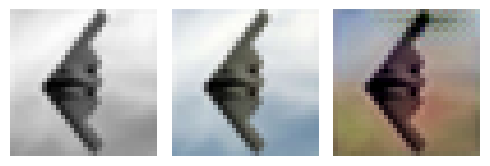

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31237242..1.363723].


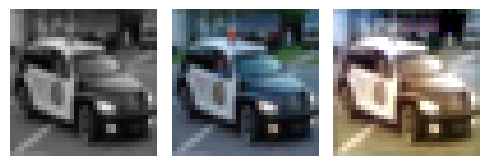

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31282455..1.0613877].


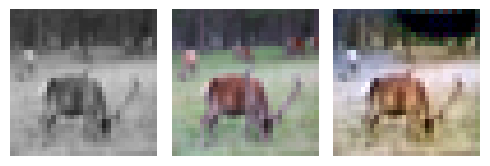

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19511028..0.78147453].


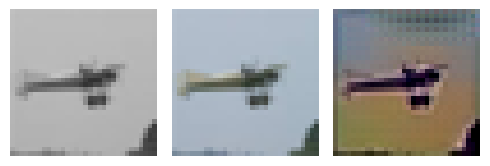

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.032674313..1.2790376].


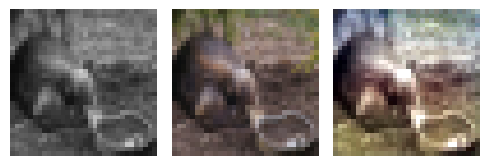

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2790718..1.2530863].


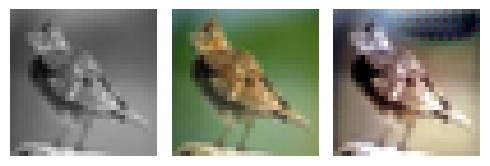

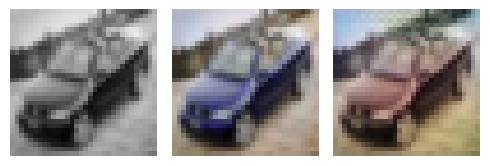

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09213637..1.0281763].


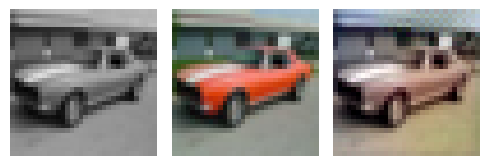

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02620535..1.1169673].


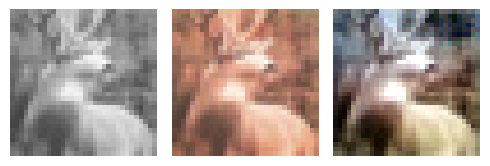

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1879503..0.90448725].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005859478..1.0617012].


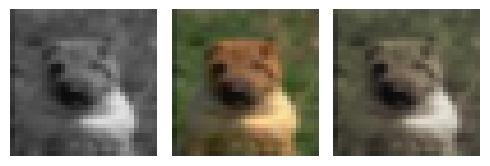

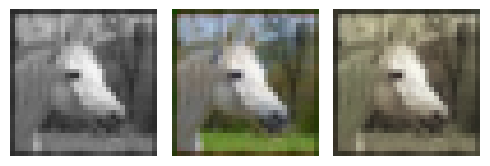

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17986707..1.2330432].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07305405..1.0598049].


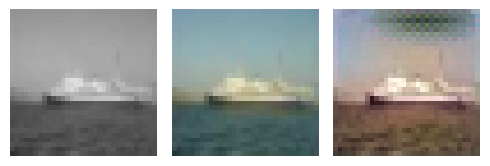

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21245839..0.7792289].


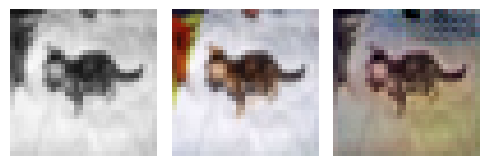

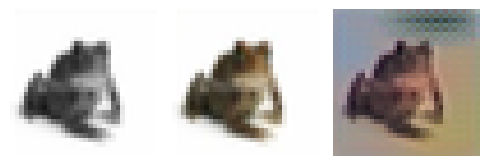

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.076701805..1.0722938].


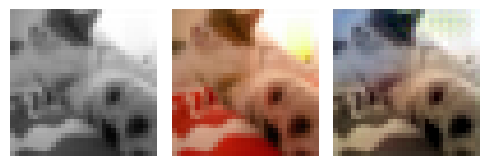

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16296561..1.1777309].


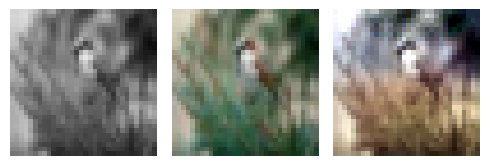

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27840838..1.1300617].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06186205..1.1206949].


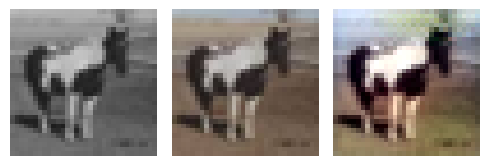

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.03238184..1.0651026].


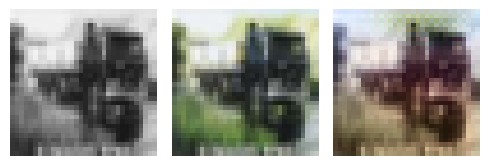

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.108681075..0.97258097].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.078783885..1.4299593].


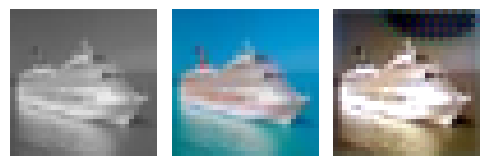

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.33351314..1.3325806].


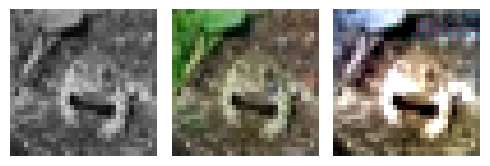

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08289621..0.92240494].


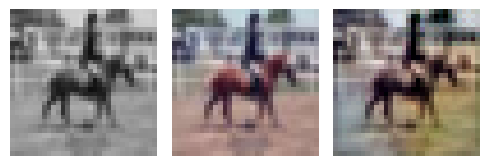

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2733723..1.170907].


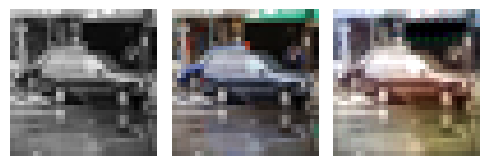

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0446007..1.1400872].


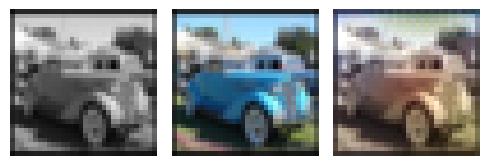

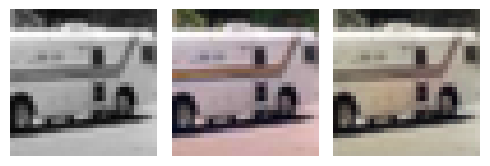

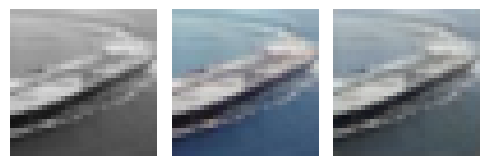

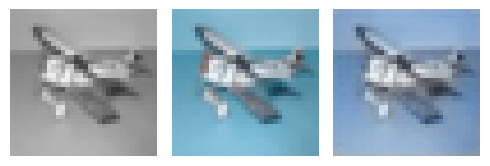

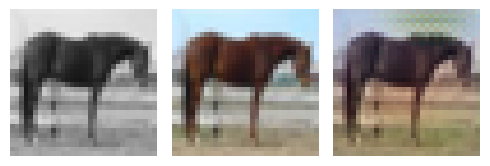

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21247593..1.1100019].


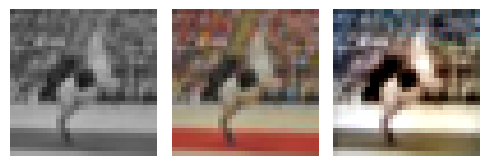

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.28083694..1.3838707].


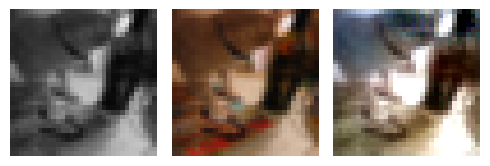

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15782718..1.0329319].


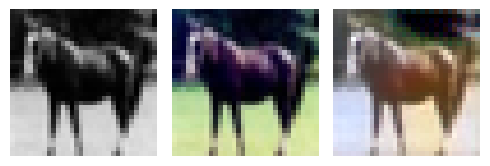

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11658844..1.3666137].


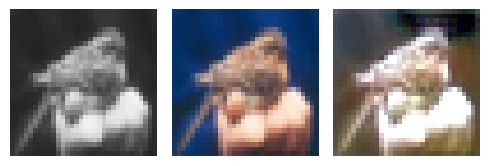

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.066607855..1.020287].


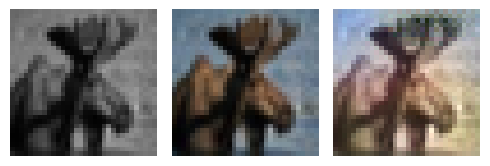

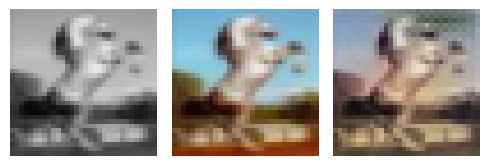

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.03448913..0.88580453].


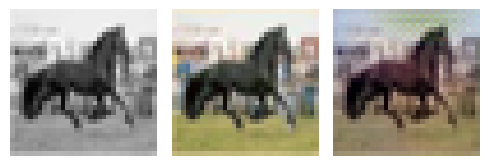

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1933772..1.2835019].


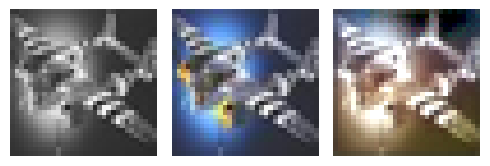

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04113083..1.1646707].


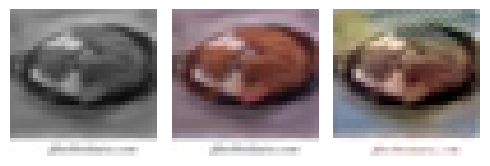

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4490916e-05..1.0197946].


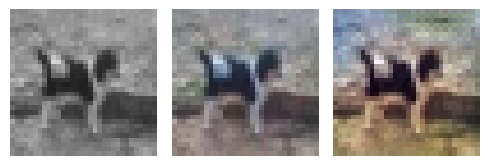

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05228337..1.0373992].


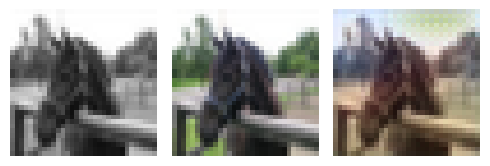

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.038243007..1.024481].


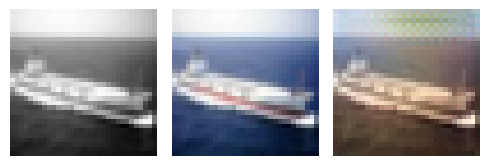

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.25754794..1.1980718].


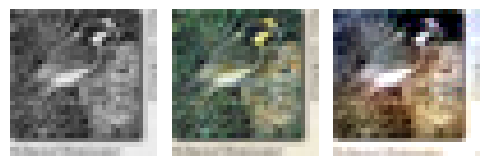

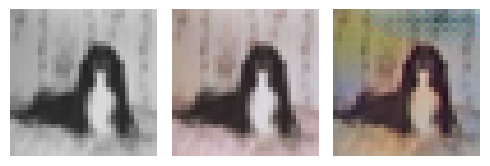

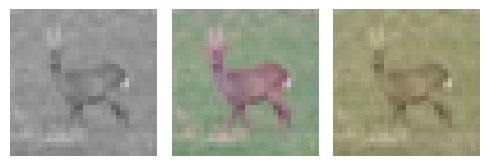

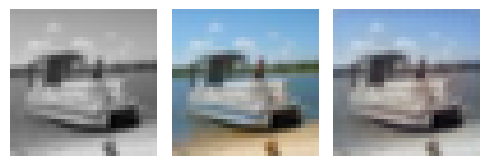

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.003735757..1.0157791].


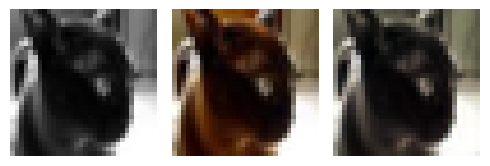

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00948142..0.8806261].


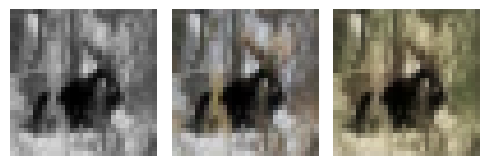

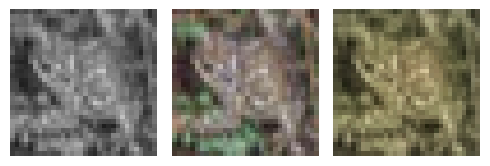

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.30914515..1.601064].


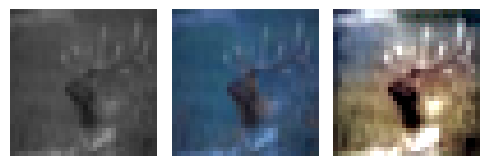

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.028853707..1.7305436].


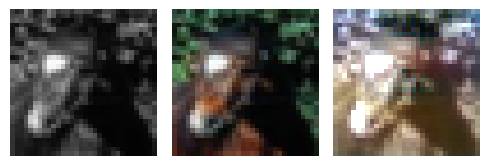

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.51246434..1.3867998].


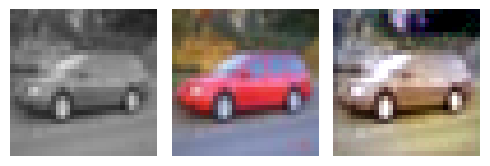

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17689729..1.042374].


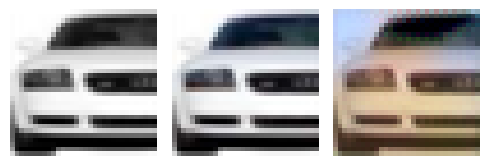

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3699386..0.9814221].


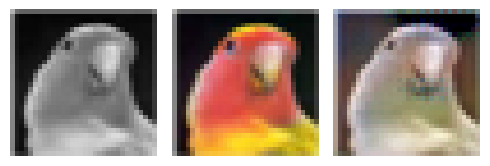

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.25675133..0.9487958].


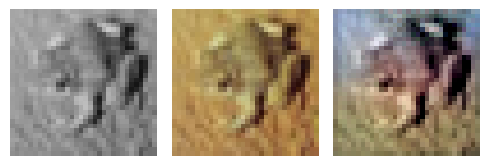

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19146687..0.7585351].


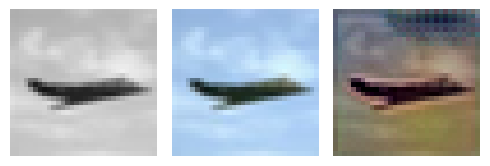

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.57930285..1.1701396].


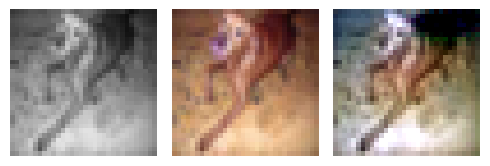

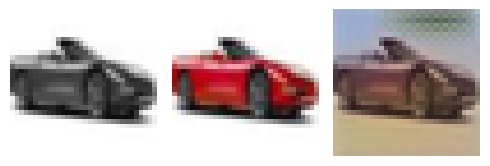

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02063118..0.84282213].


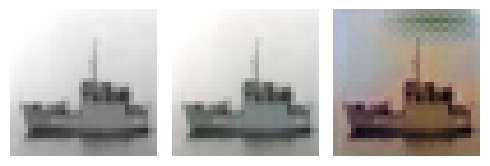

In [ ]:
model, optimizer, criterion = get_model()
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

_val_dl = DataLoader(val_ds, batch_size=1, shuffle=True)

n_epochs = 100
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss = train_batch(model, data, optimizer, criterion)
        if(bx+1)%50 == 0:
            for _ in range(5):
                a,b = next(iter(_val_dl))
                _b = model(a)
                subplots([a[0], b[0], _b[0]], nc=3, figsize=(5,5))
    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss = validate_batch(model, data, criterion)
    exp_lr_scheduler.step()
    for _ in range(5):
        a,b = next(iter(_val_dl))
        _b = model(a)
        subplots([a[0],b[0],_b[0]], nc=3, figsize=(5,5))

In this project, the Colorize dataset generates grayscale inputs with color targets, and DataLoaders handle batching and shuffling for efficient training. The ```train_batch``` and ```validate_batch``` functions update model weights and evaluate performance, respectively. Together, these components enable the model to map grayscale inputs to realistic, colorized outputs effectively.

### What is U-Net?

U-Net, the architecture used for the development of this last project, is a type of convolutional neural network (CNN) widely used for image-to-image tasks, such as segmentation, denoising, and colorization, consisting of DownConv layers to extract spatial features and UpConv layers to reconstruct colorized images, preserving fine details through skip connections, which is great for developing models that colorizes images.